EDA - analiza zbiorów 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from preprocess import Preprocess
import seaborn as sns
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

MENTAL_HEALTH = './data/Mental-Health-Twitter.csv'
SUSPICIOUS_COMMUNICATION = './data/Suspicious Communication on Social Platforms.csv'
DISASTER = './data/disaster_tweets/train.csv'

In [ ]:
df = pd.read_json('./results/disaster', lines=True)

In [6]:
def bin_classify(row: pd.DataFrame, column_name: str) -> int:
    """
    method classifies if given text is retweet or not
    :return: 1 if is retweet, 0 if not
    """
    return 0 if row[column_name]==[] else 1

In [ ]:
df['hashtags_bin'] = df.apply(lambda row: bin_classify(row, 'hashtags'), axis=1)
df['emojis_bin'] = df.apply(lambda row: bin_classify(row, 'emojis'), axis=1)
df['links_bin'] = df.apply(lambda row: bin_classify(row, 'links'), axis=1)
df['references_bin'] = df.apply(lambda row: bin_classify(row, 'references'), axis=1)
df.head()

In [ ]:
df.info()
df.describe()

In [ ]:
df['target'].value_counts().plot(kind='bar')

In [ ]:
df.isnull().sum()

In [ ]:
df_grouped = df.groupby('target')
df_grouped['polarity'].hist(alpha=0.8, bins=15, legend=True)
plt.title('Polarity by target')

In [ ]:
df_grouped = df.groupby('target')
df_grouped['subjectivity'].hist(alpha=0.8, bins=15, legend=True )
plt.title('Subjectivity by target')

In [ ]:
df_grouped = df.groupby('target')
df_grouped['sentiment'].hist(alpha=0.8, bins=15, legend=True )
plt.title('Sentiment by target')

In [ ]:
sns.heatmap(df[['target', 'is_retweet','hashtags_bin','references_bin','links_bin','emojis_bin']].corr(), annot=True, cmap='Reds')

In [ ]:
df_grouped = df.groupby('target')
plt.subplot(2,1,1)
plt.title('Link presence with target = 0')
df_grouped['links_bin'].get_group(0).value_counts().plot(kind='bar', alpha=0.8, xticks=(0,1))
plt.subplot(2,1,2)
plt.title('Link presence with target = 1')
df_grouped['links_bin'].get_group(1).value_counts().plot(kind='bar', alpha=0.8, ylim=(0,2500))

In [ ]:
df['location'].value_counts().head(20).plot(kind='bar')

In [ ]:
allwords = df['text'].str.split("[^\w+]").explode().tolist()
mostcommon = FreqDist(allwords).most_common(100)

wordcloud = WordCloud(width=1600, height=850, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)

In [ ]:
allwords_1 = df.groupby(['target']).get_group(1)['text'].str.split("[^\w+]").explode().tolist()
mostcommon_1 = FreqDist(allwords_1).most_common(20)
x, y = zip(*mostcommon_1)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words',fontsize=40)
plt.ylabel('Frequency of Words',fontsize=40)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words, target = 1', fontsize=60)

In [ ]:
mostcommon_small = FreqDist(allwords).most_common(20)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words', fontsize=60)

In [ ]:
allwords_0 = df.groupby(['target']).get_group(0)['text'].str.split("[^\w+]").explode().tolist()
mostcommon_0 = FreqDist(allwords_0).most_common(20)
x, y = zip(*mostcommon_0)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words, target = 0', fontsize=60)

In [ ]:
allwords_1 = df.groupby(['target']).get_group(1)['text'].str.split("[^\w+]").explode().tolist()
mostcommon_1 = FreqDist(allwords_1).most_common(20)
x, y = zip(*mostcommon_1)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words',fontsize=40)
plt.ylabel('Frequency of Words',fontsize=40)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words, target = 1', fontsize=60)

Change dataset to mental_health

In [8]:
df = pd.read_json('./results/mental_health', lines=True)

In [44]:
df['hashtags_bin'] = df.apply(lambda row: bin_classify(row, 'hashtags'), axis=1)
df['emojis_bin'] = df.apply(lambda row: bin_classify(row, 'emojis'), axis=1)
df['links_bin'] = df.apply(lambda row: bin_classify(row, 'links'), axis=1)
df['references_bin'] = df.apply(lambda row: bin_classify(row, 'references'), axis=1)
df.head()

Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   

                                                text     user_id  followers  \
0  2 year diagnosed anxiety depression today taki...  1013187241         84   
1      sunday break planning spend time possible a14  1013187241         84   
2                       awake tired sleep brain idea  1013187241         84   
3  retro bear make perfect gift great beginner st...  1013187241         84   
4  hard packing list making life easier reinforci...  1013187241         84   

   friends  favourites  statuses  retweets  ...  references  \
0      211         251       837         0  ...          []   
1      211         251       837         1  ...          []   
2      211         251       837         0  ...          []   
3      211         251       837         2  ...          []   
4      211         251       837         1  ...          []   

                 hashtags  emojis  polarity subjectivity sentiment  \
0   [anxiety, depression]      []  0.100000     1.000000  Positive   
1                   [A14]      [] -0.093750     0.750000  Negative   
2                      []      [] -0.262500     0.537500  Negative   
3            [Retro, yay]      []  0.900000     0.875000  Positive   
4  [movinghouse, anxiety]      [] -0.045833     0.370833  Negative   

  hashtags_bin  emojis_bin  links_bin references_bin  
0            1           0          0              0  
1            1           0          0              0  
2            0           0          0              0  
3            1           0          1              0  
4            1           0          0              0  

[5 rows x 24 columns]

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    20000 non-null  int64  
 1   post_id       20000 non-null  int64  
 2   post_created  20000 non-null  object 
 3   text          20000 non-null  object 
 4   user_id       20000 non-null  int64  
 5   followers     20000 non-null  int64  
 6   friends       20000 non-null  int64  
 7   favourites    20000 non-null  int64  
 8   statuses      20000 non-null  int64  
 9   retweets      20000 non-null  int64  
 10  target        20000 non-null  int64  
 11  links         20000 non-null  object 
 12  is_retweet    20000 non-null  int64  
 13  retweet_of    20000 non-null  object 
 14  references    20000 non-null  object 
 15  hashtags      20000 non-null  object 
 16  emojis        20000 non-null  object 
 17  polarity      20000 non-null  float64
 18  subjectivity  20000 non-nu

Unnamed: 0       post_id       user_id     followers       friends  \
count  20000.000000  2.000000e+04  2.000000e+04  20000.000000  20000.000000   
mean    9999.500000  6.874728e+17  3.548623e+16    900.483950    782.428750   
std     5773.647028  1.708396e+17  1.606083e+17   1899.913961   1834.817945   
min        0.000000  3.555966e+09  1.472438e+07      0.000000      0.000000   
25%     4999.750000  5.931686e+17  3.242944e+08    177.000000    211.000000   
50%     9999.500000  7.637400e+17  1.052122e+09    476.000000    561.000000   
75%    14999.250000  8.153124e+17  2.285923e+09   1197.000000    701.000000   
max    19999.000000  8.194574e+17  7.631825e+17  28614.000000  28514.000000   

         favourites      statuses       retweets        target   is_retweet  \
count  20000.000000  2.000000e+04   20000.000000  20000.000000  20000.00000   
mean    6398.235550  4.439442e+04    1437.927300      0.500000      0.18525   
std     8393.072914  1.407785e+05   15119.665118      0.500013      0.38851   
min        0.000000  3.000000e+00       0.000000      0.000000      0.00000   
25%      243.000000  5.129000e+03       0.000000      0.000000      0.00000   
50%     2752.000000  1.325100e+04       0.000000      0.500000      0.00000   
75%     8229.000000  5.289200e+04       1.000000      1.000000      0.00000   
max    39008.000000  1.063601e+06  839540.000000      1.000000      1.00000   

           polarity  subjectivity  
count  20000.000000  20000.000000  
mean       0.061490      0.318576  
std        0.288962      0.333407  
min       -1.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.233333  
75%        0.168182      0.593750  
max        1.000000      1.000000

<AxesSubplot: >

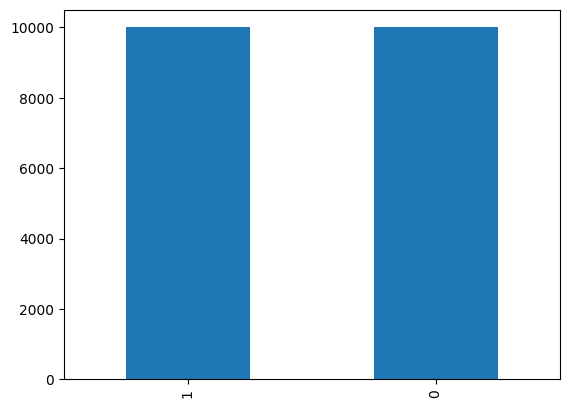

In [10]:
df['target'].value_counts().plot(kind='bar')

In [11]:
df.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
text            0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
target          0
links           0
is_retweet      0
retweet_of      0
references      0
hashtags        0
emojis          0
polarity        0
subjectivity    0
sentiment       0
dtype: int64

Text(0.5, 1.0, 'Polarity by target')

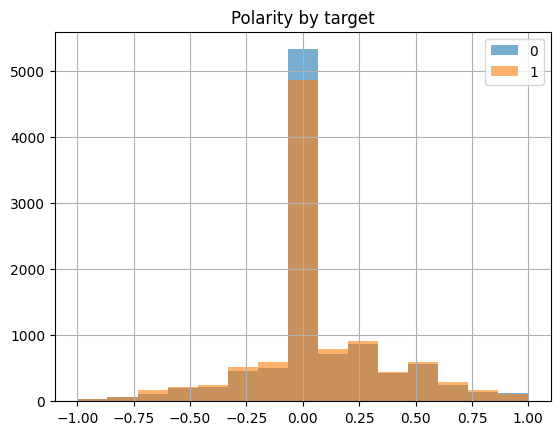

In [13]:
df_grouped = df.groupby('target')
df_grouped['polarity'].hist(alpha=0.6, bins=15, legend=True)
plt.title('Polarity by target')

Text(0.5, 1.0, 'Subjectivity by target')

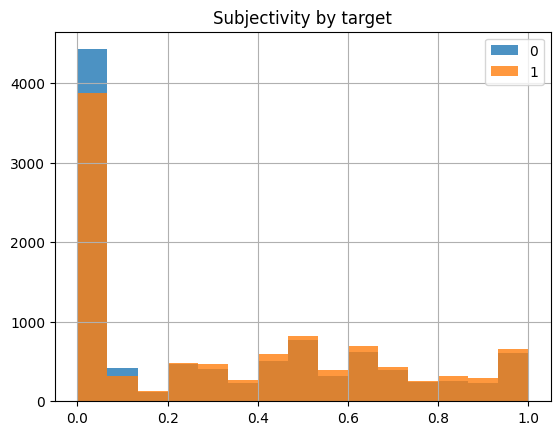

In [14]:
df_grouped = df.groupby('target')
df_grouped['subjectivity'].hist(alpha=0.8, bins=15, legend=True)
plt.title('Subjectivity by target')

Text(0.5, 1.0, 'Followers by target')

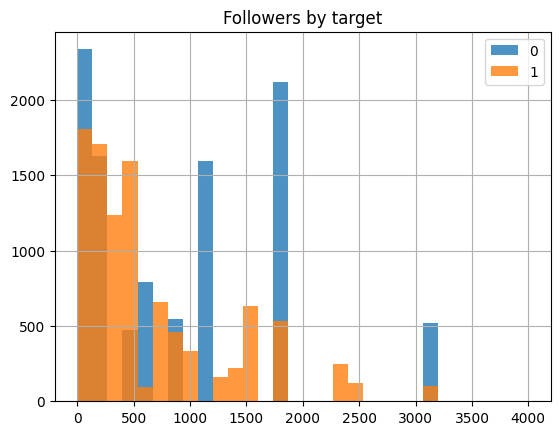

In [38]:
df_grouped = df.groupby('target')
df_grouped['followers'].hist(alpha=0.8, bins=30, legend=True, range=[0, 4000])
plt.title('Followers by target')

<AxesSubplot: >

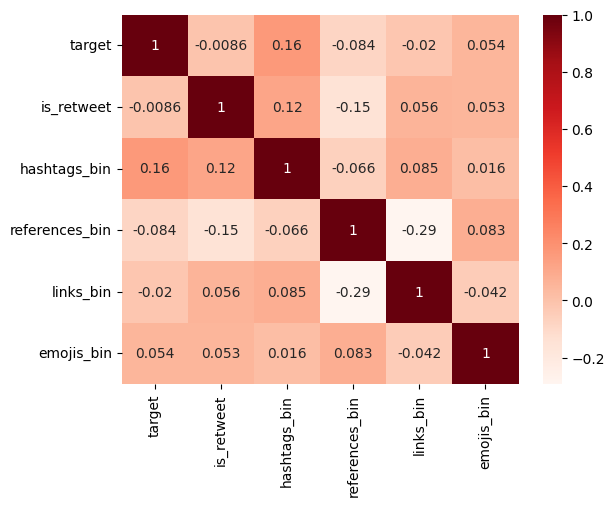

In [45]:
sns.heatmap(df[['target', 'is_retweet','hashtags_bin','references_bin','links_bin','emojis_bin']].corr(), annot=True, cmap='Reds')

<AxesSubplot: title={'center': 'Hashtags presence with target = 1'}>

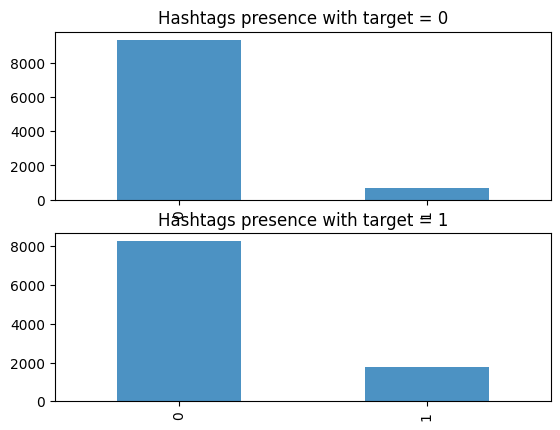

In [48]:
df_grouped = df.groupby('target')
plt.subplot(2,1,1)
plt.title('Hashtags presence with target = 0')
df_grouped['hashtags_bin'].get_group(0).value_counts().plot(kind='bar', alpha=0.8, xticks=(0,1))
plt.subplot(2,1,2)
plt.title('Hashtags presence with target = 1')
df_grouped['hashtags_bin'].get_group(1).value_counts().plot(kind='bar', alpha=0.8)

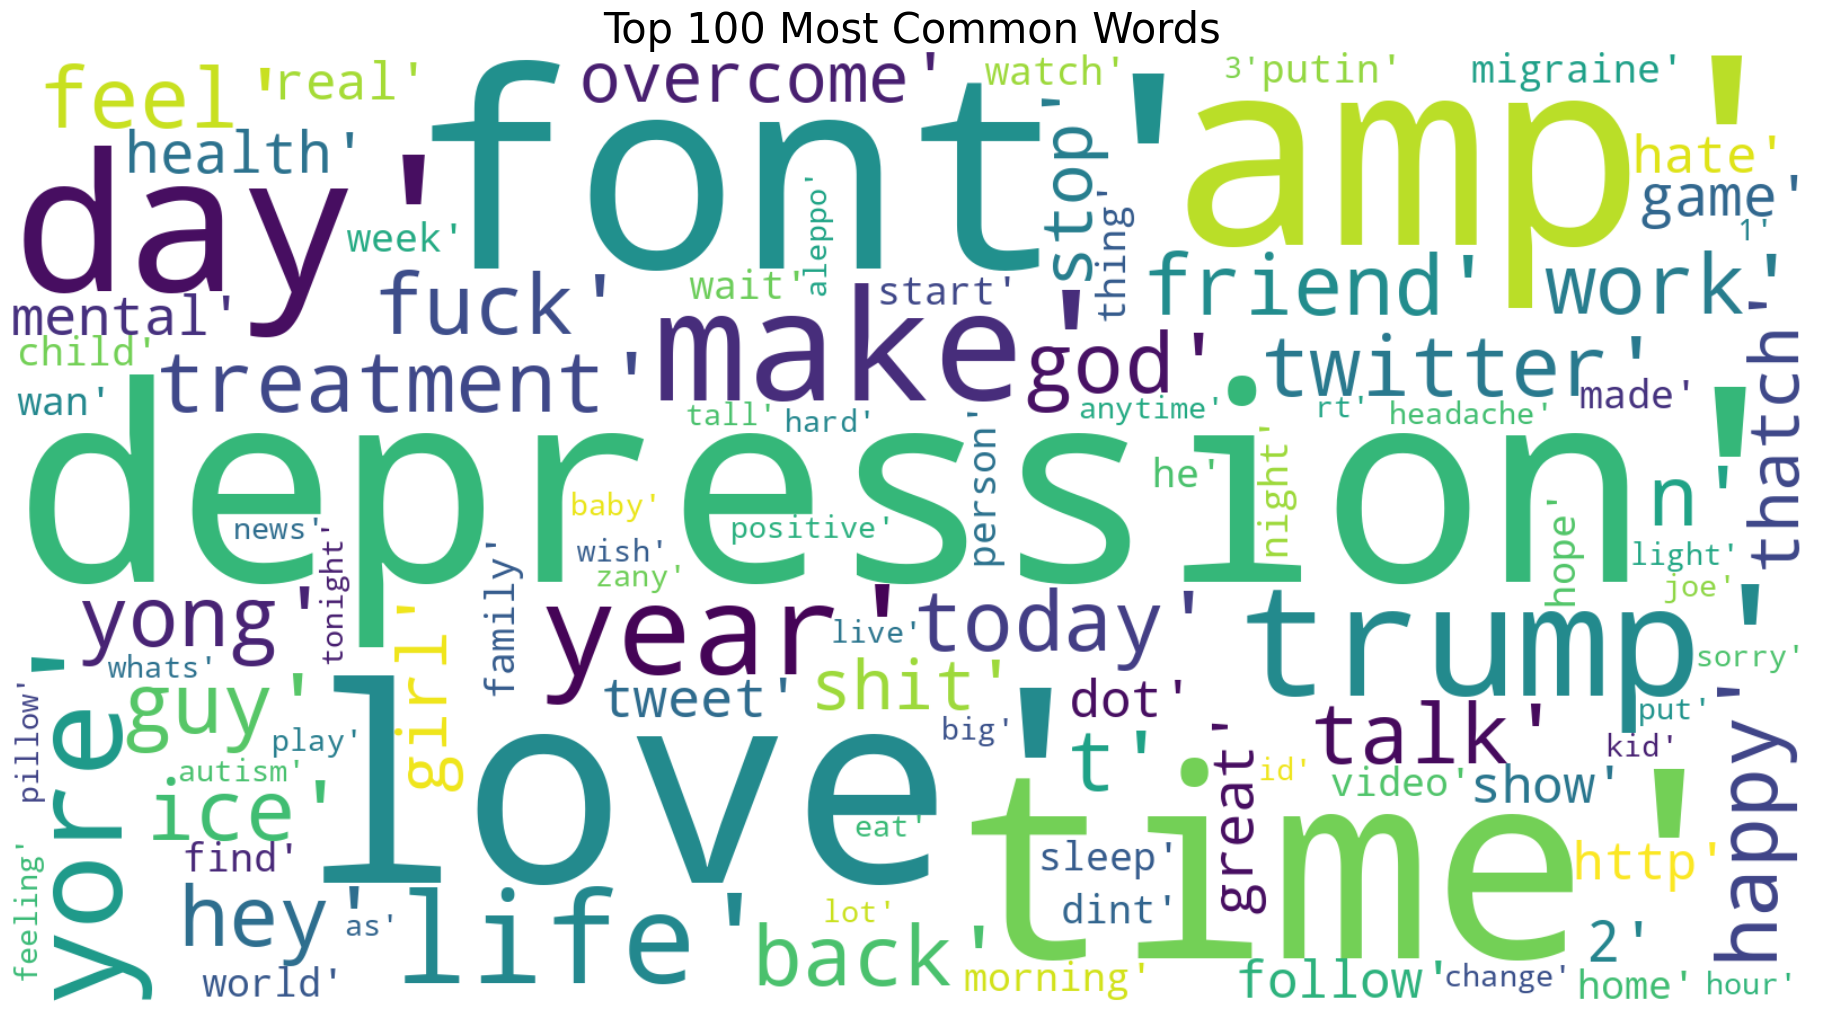

In [52]:
allwords = df['text'].str.split("[^\w+]").explode().tolist()
mostcommon = FreqDist(allwords).most_common(100)

wordcloud = WordCloud(width=1600, height=850, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)

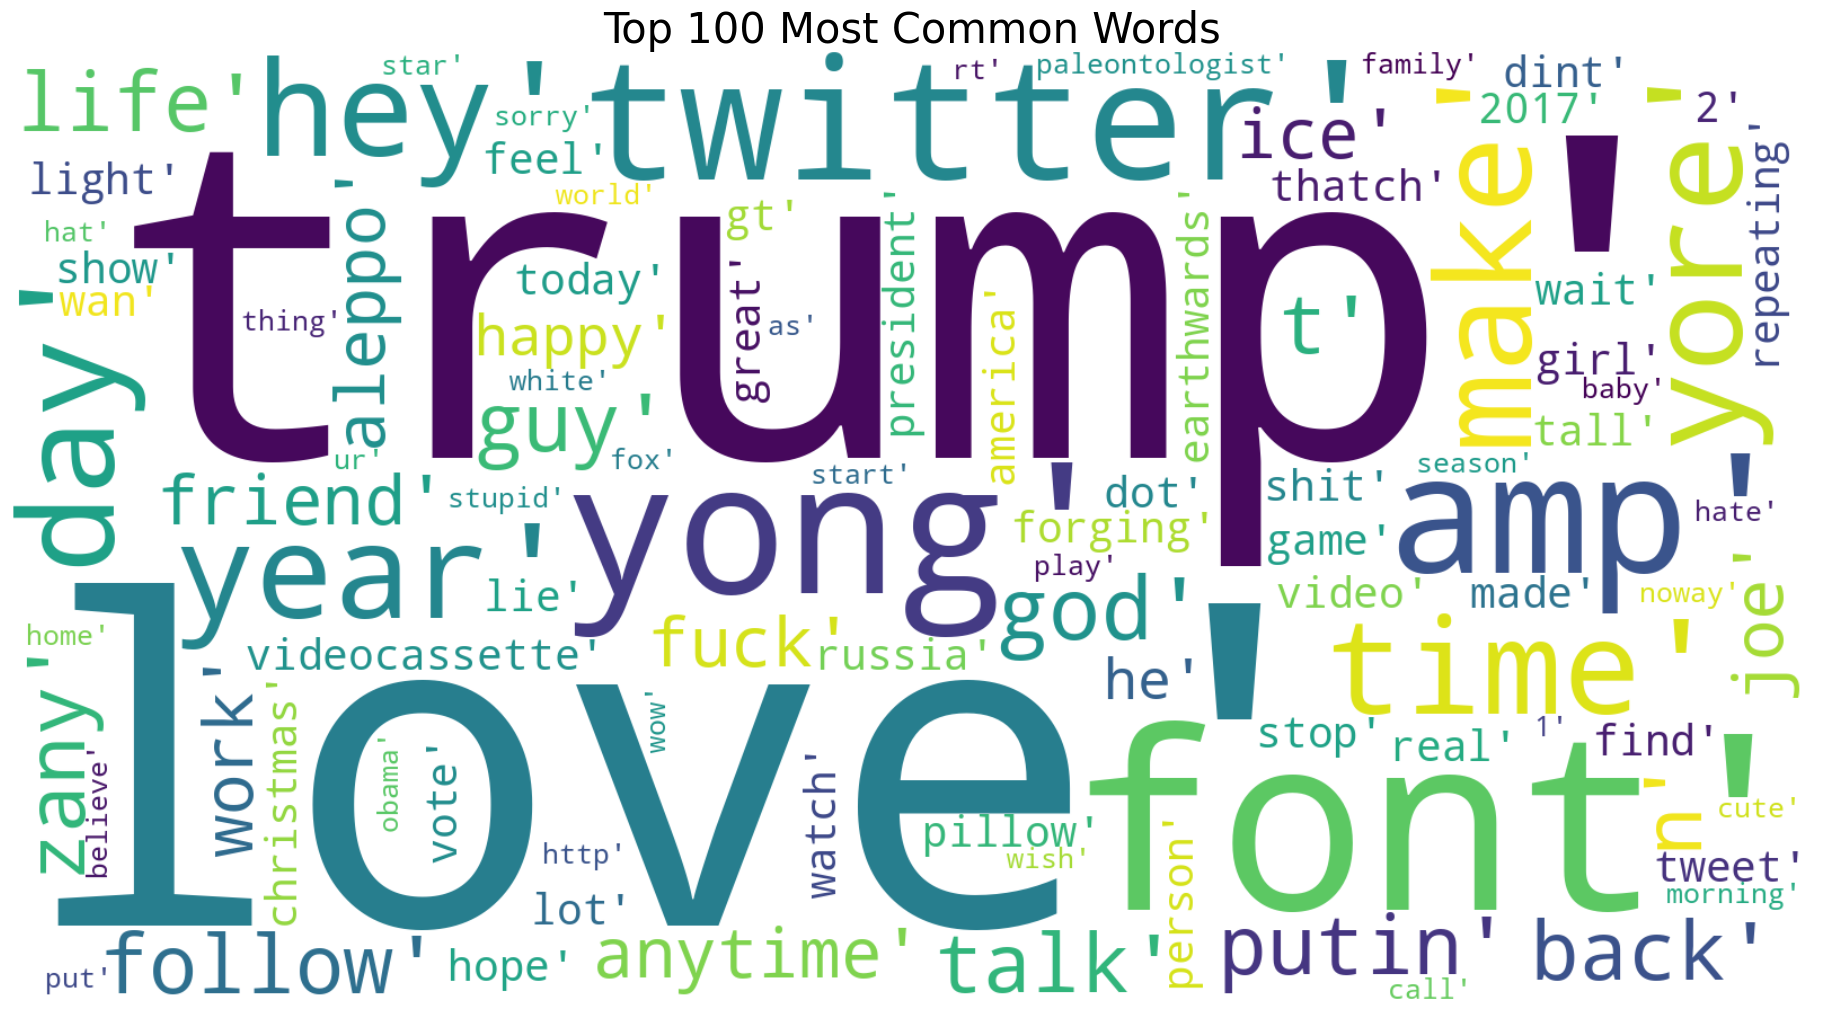

In [53]:
allwords_0 = df.groupby(['target']).get_group(0)['text'].str.split("[^\w+]").explode().tolist()
mostcommon = FreqDist(allwords_0).most_common(100)

wordcloud = WordCloud(width=1600, height=850, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)

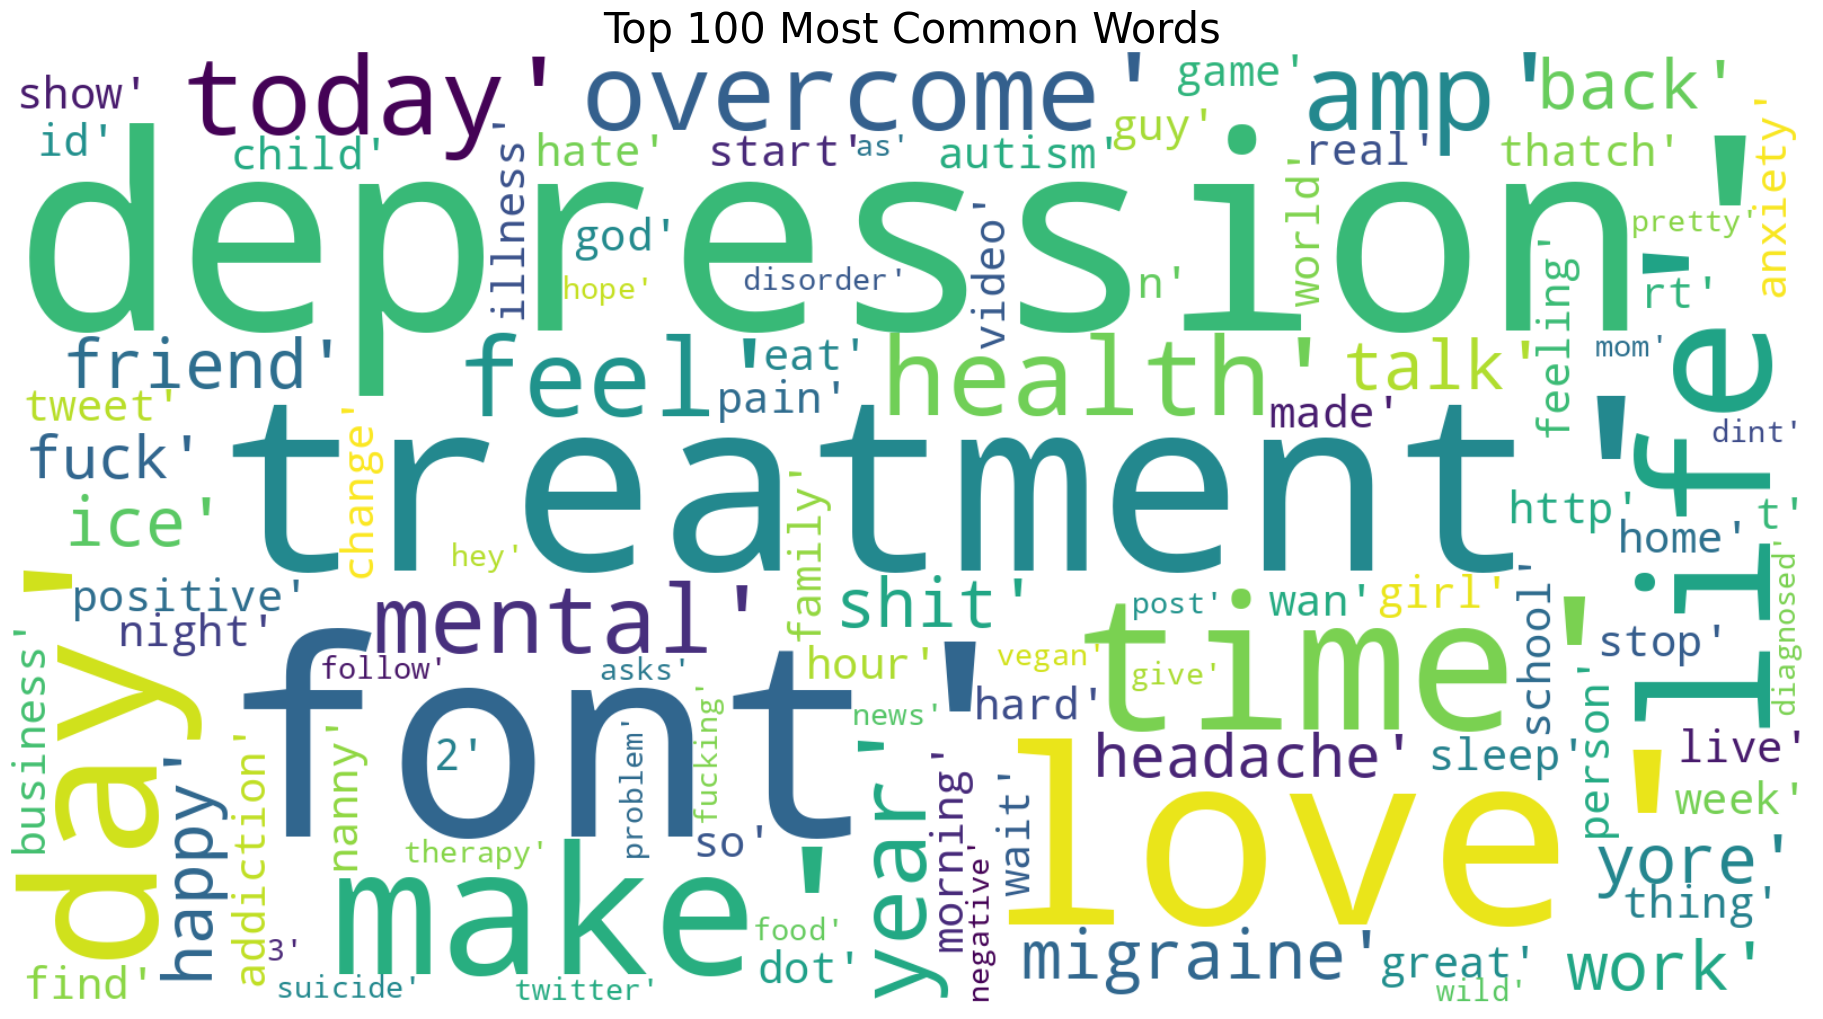

In [56]:
allwords_1 = df.groupby(['target']).get_group(1)['text'].str.split("[^\w+]").explode().tolist()
mostcommon = FreqDist(allwords_1).most_common(100)

wordcloud = WordCloud(width=1600, height=850, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)

Text(0.5, 1.0, 'Frequency of 20 Most Common Words')

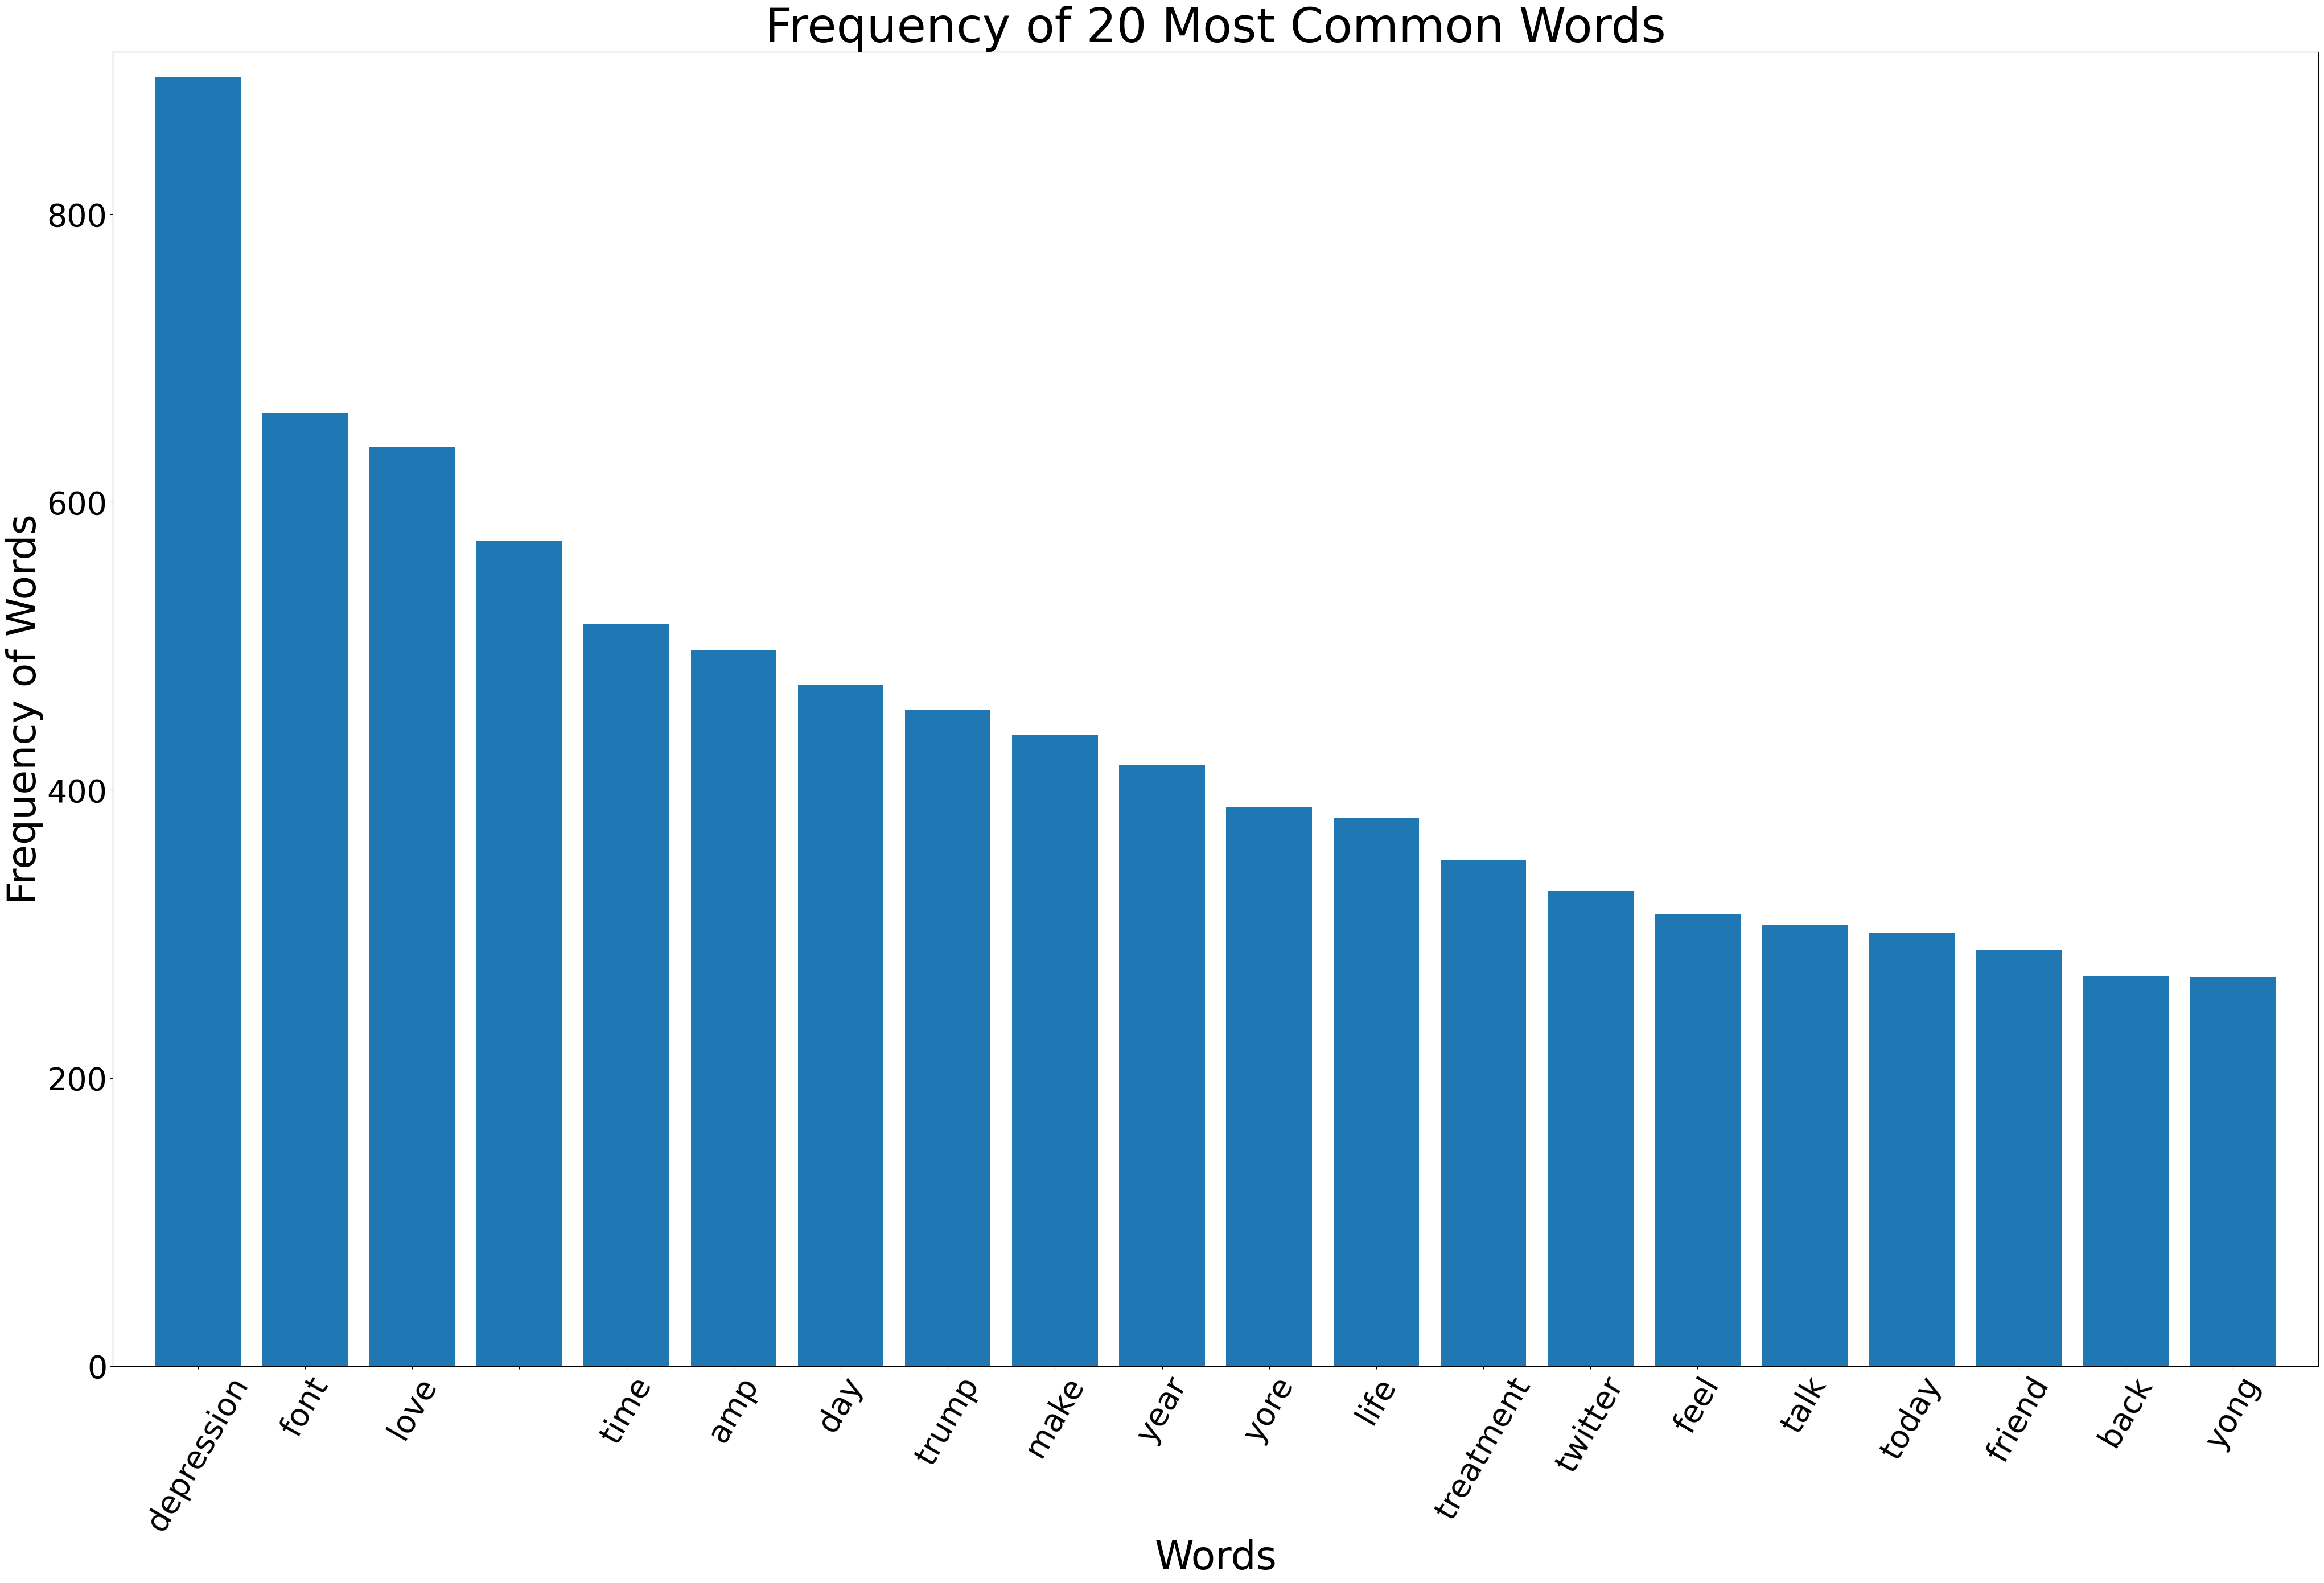

In [54]:
mostcommon_small = FreqDist(allwords).most_common(20)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words', fontsize=60)

Text(0.5, 1.0, 'Frequency of 20 Most Common Words, target = 0')

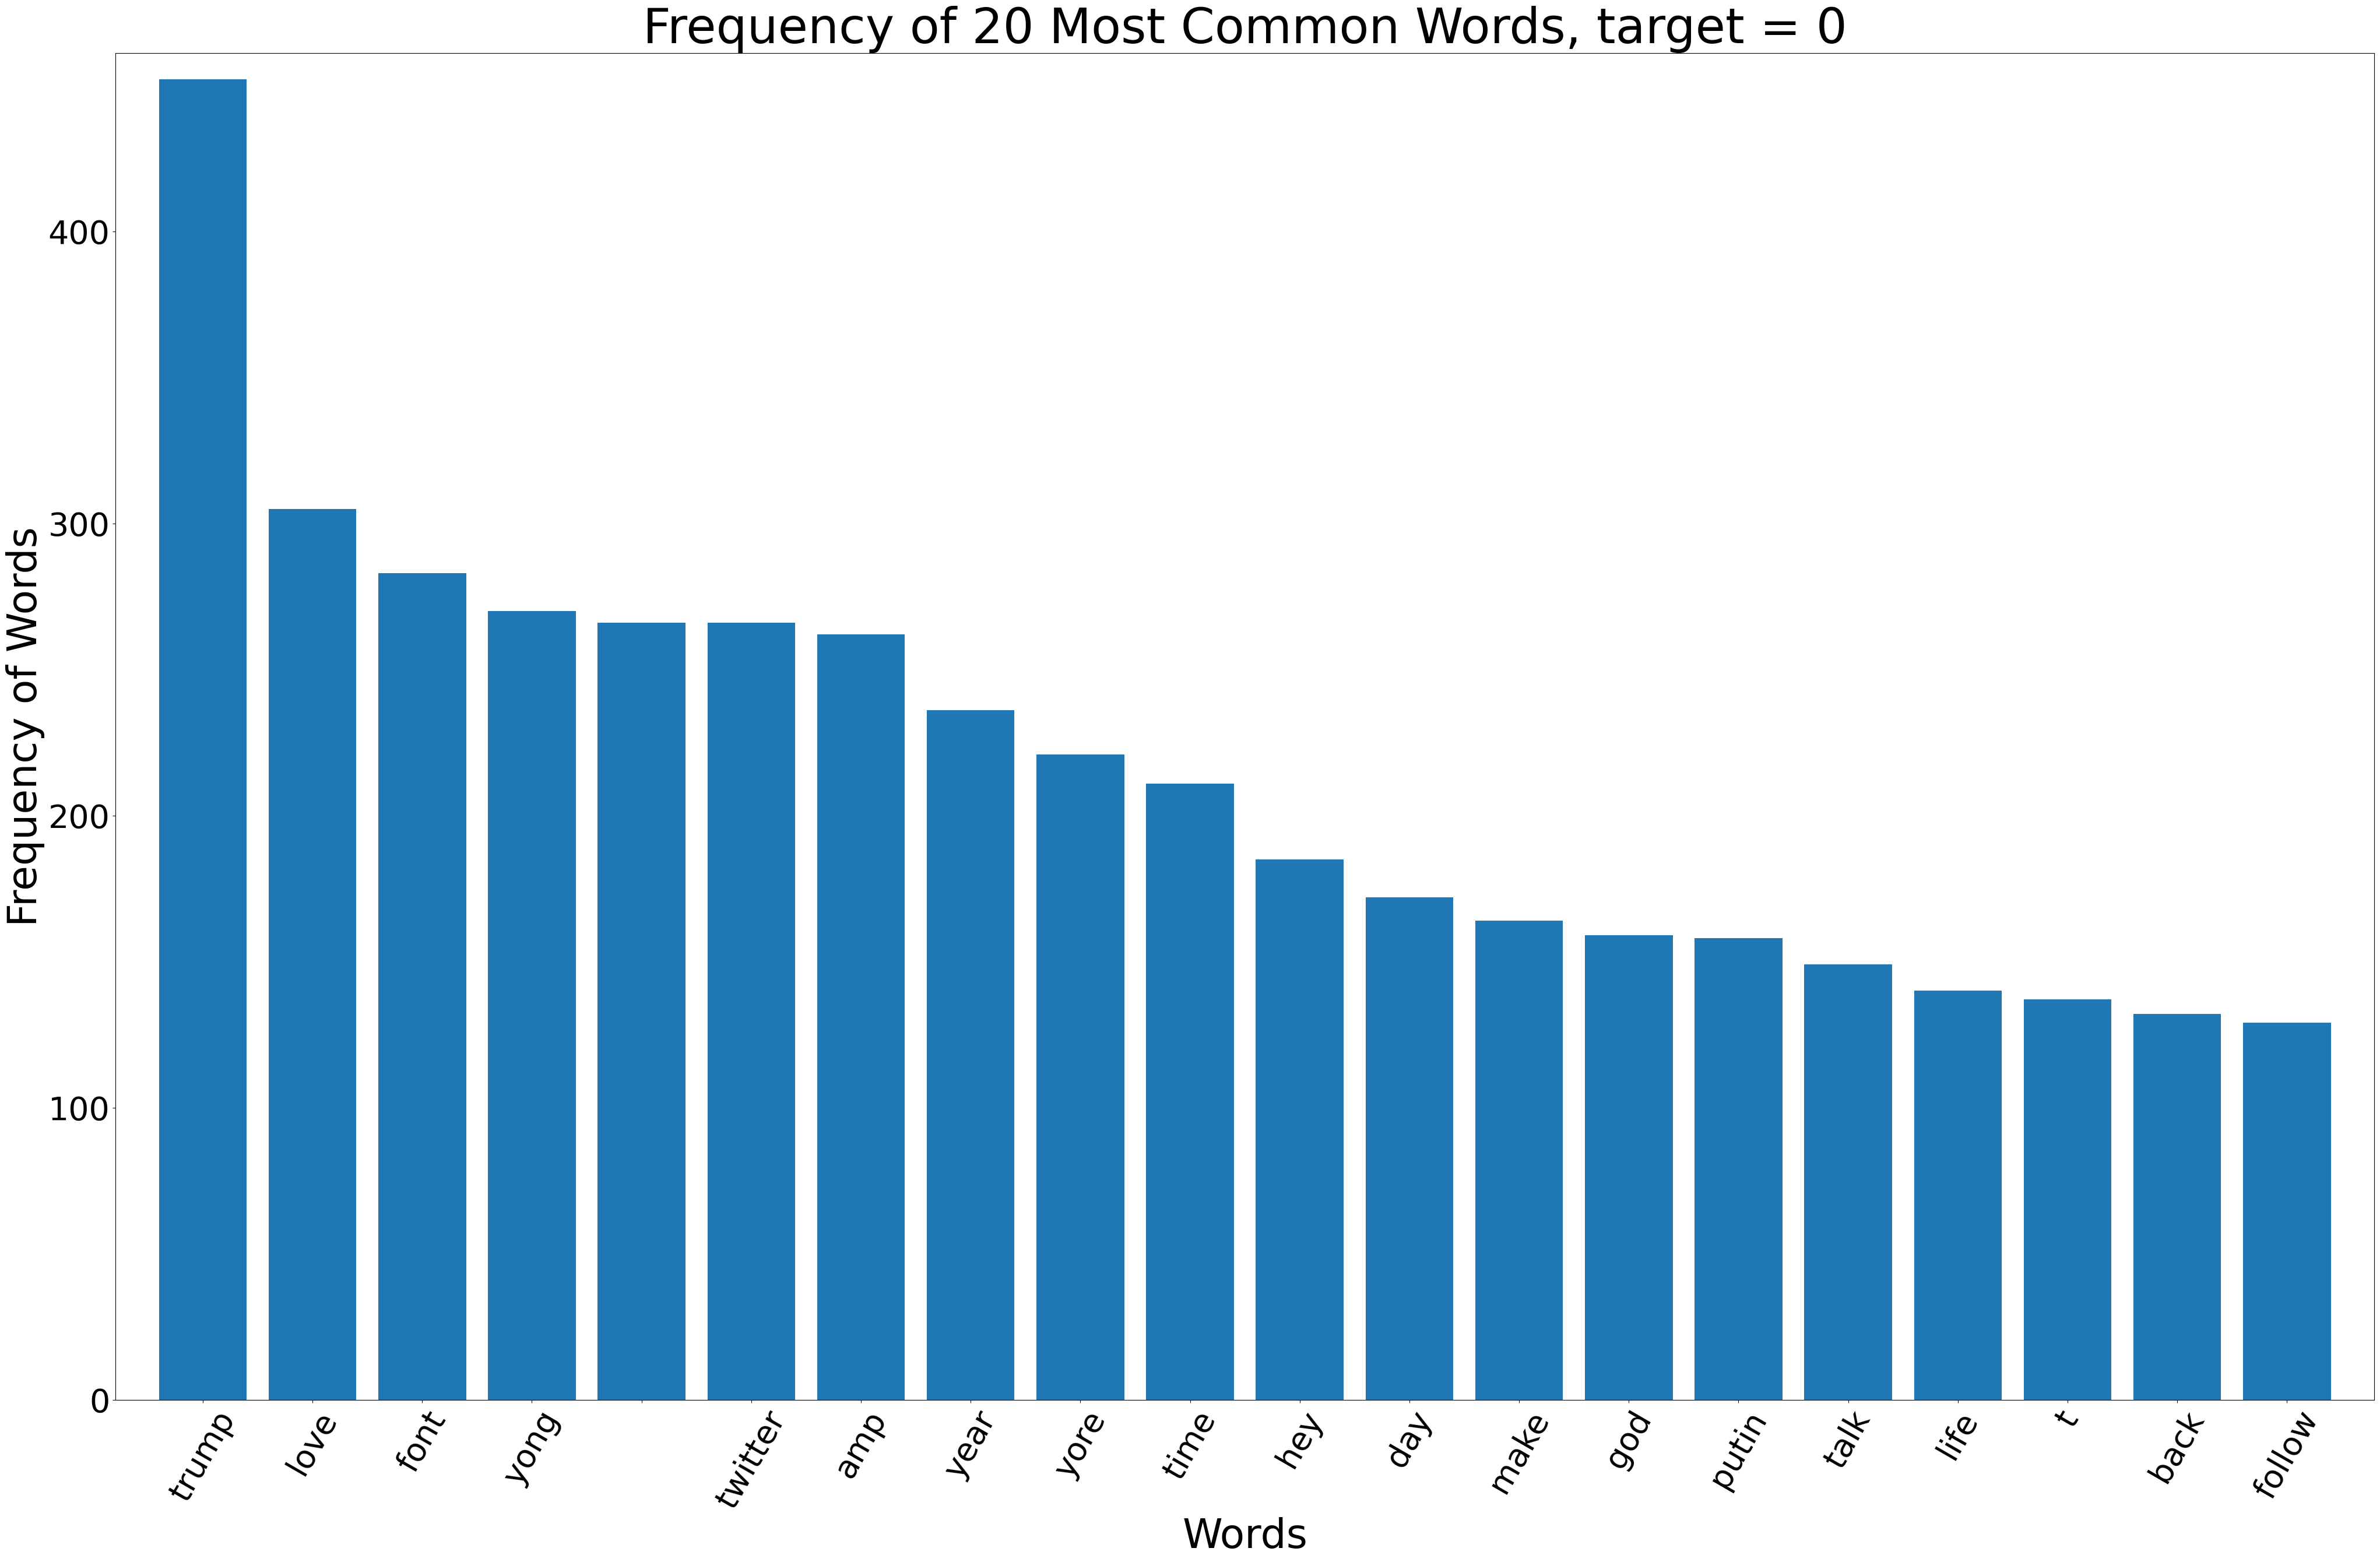

In [57]:
allwords_0 = df.groupby(['target']).get_group(0)['text'].str.split("[^\w+]").explode().tolist()
mostcommon_0 = FreqDist(allwords_0).most_common(20)
x, y = zip(*mostcommon_0)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words, target = 0', fontsize=60)

Text(0.5, 1.0, 'Frequency of 20 Most Common Words, target = 1')

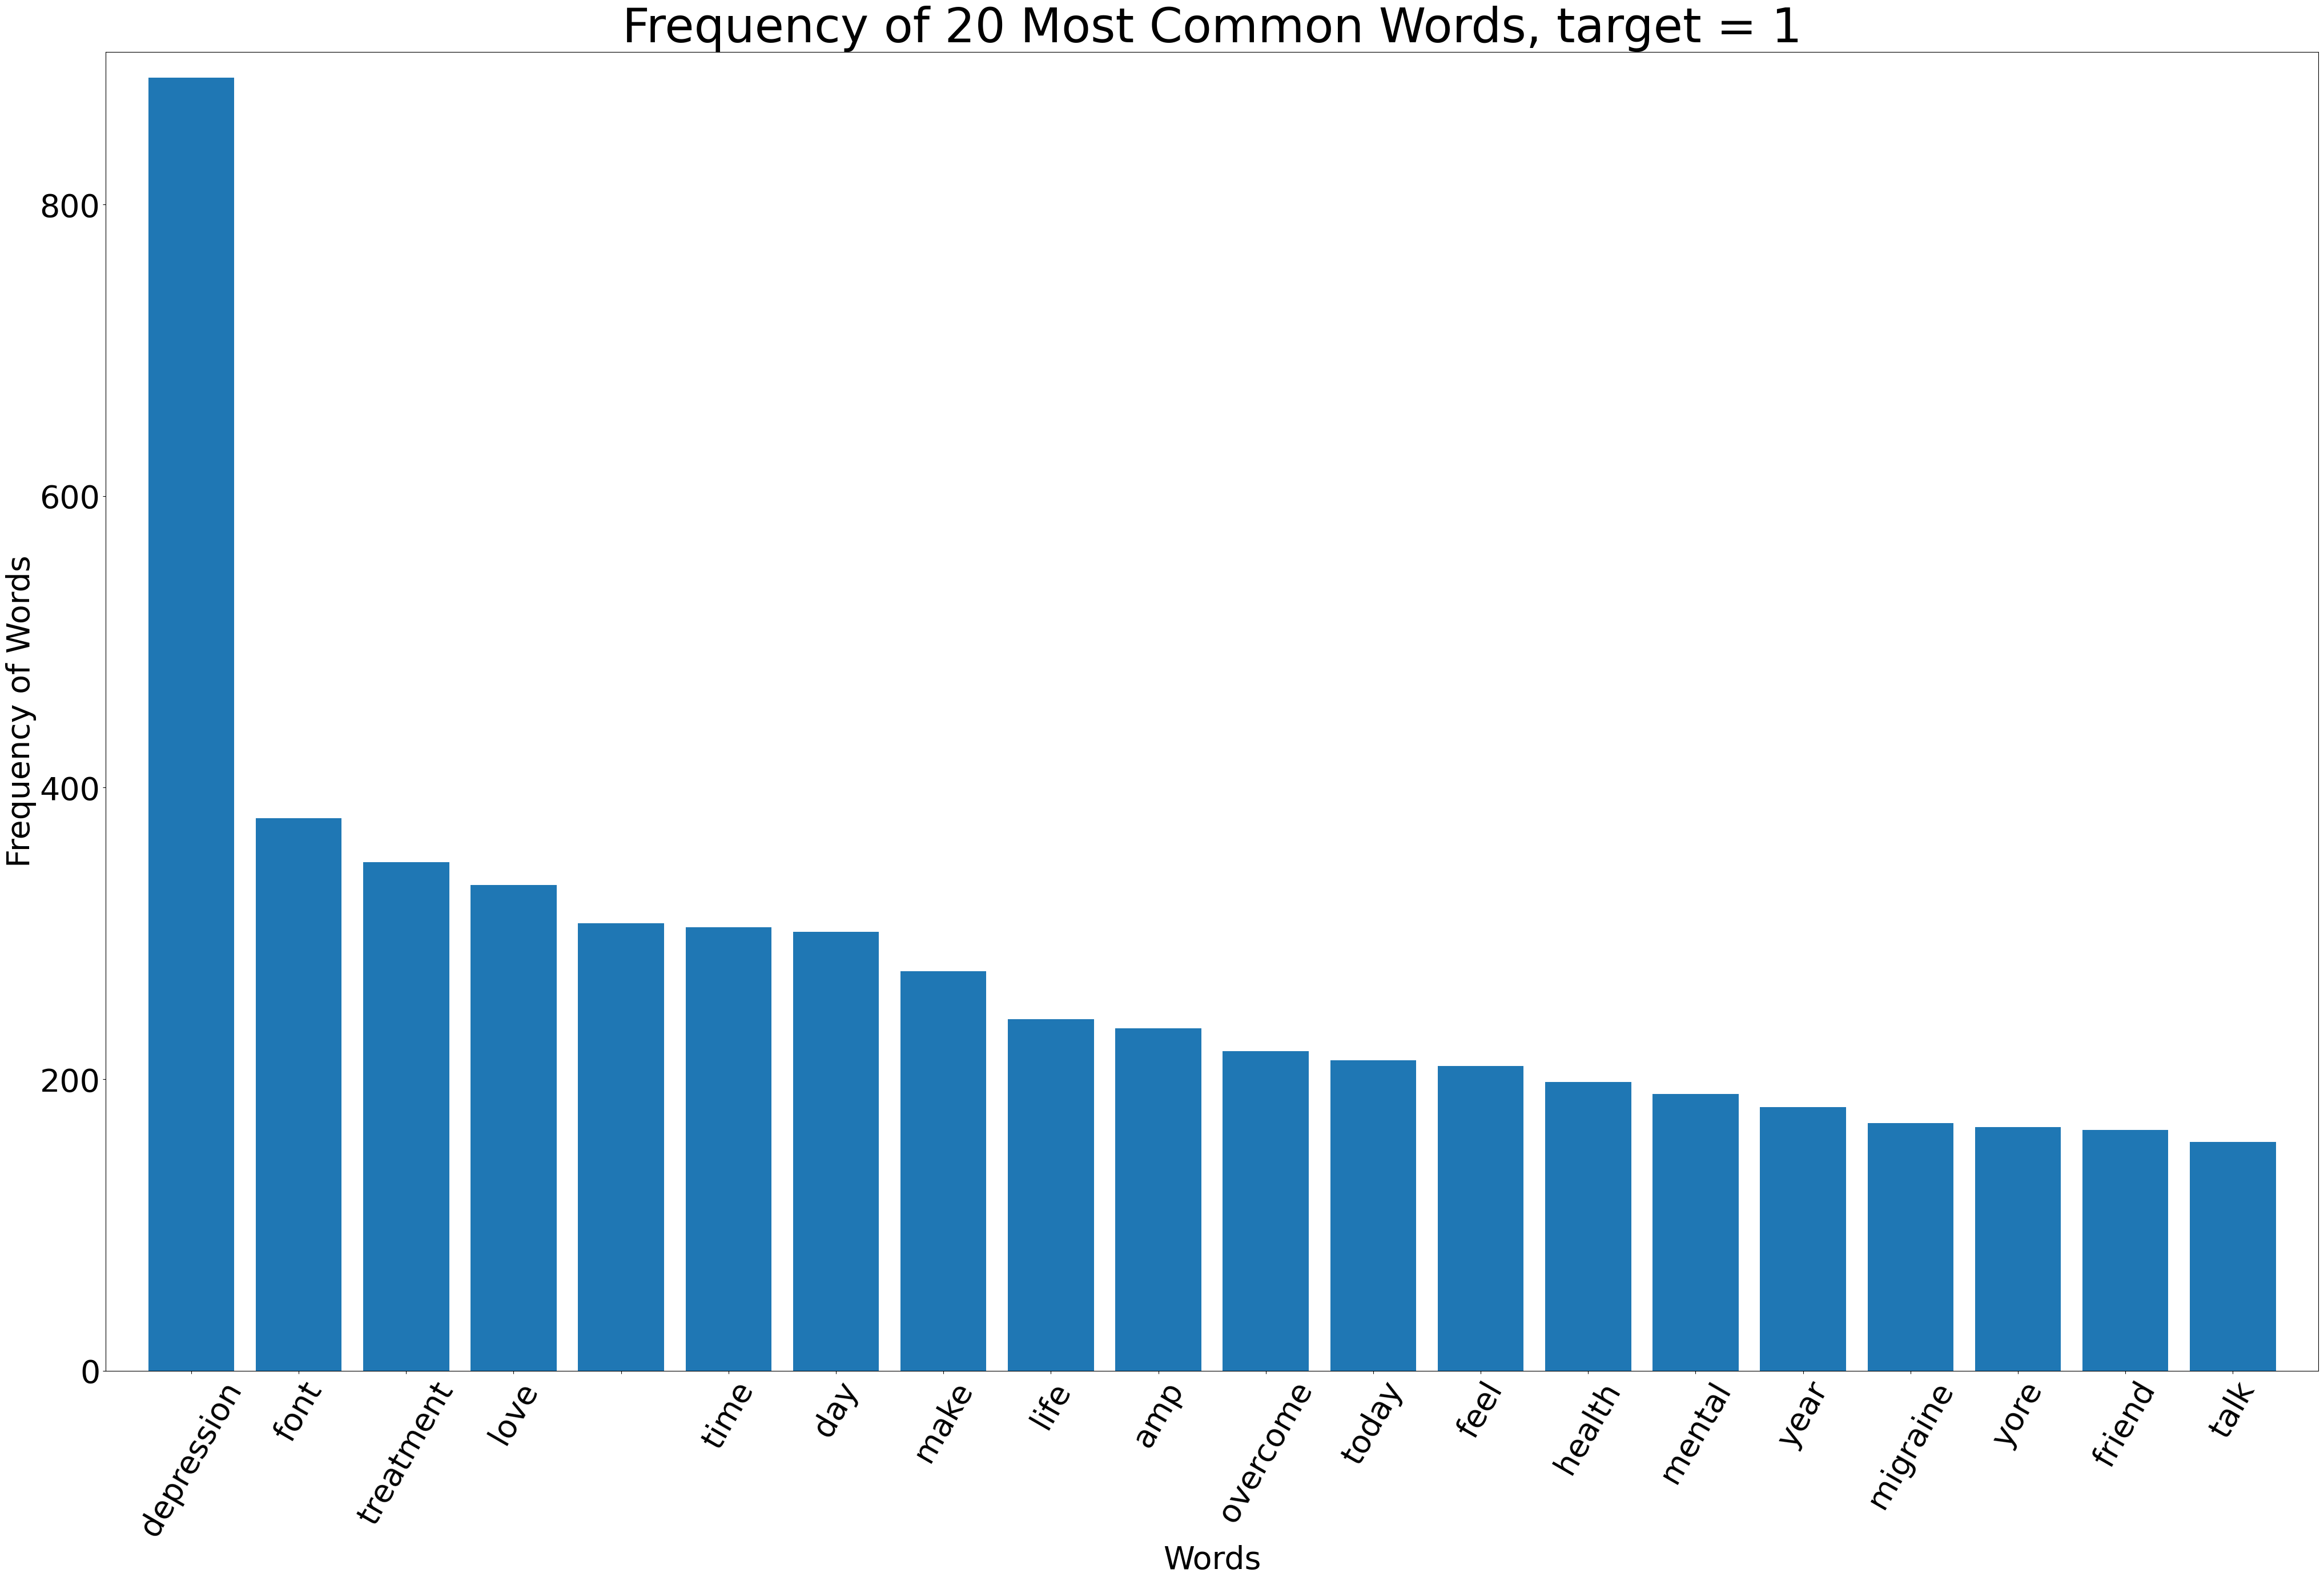

In [59]:
allwords_1 = df.groupby(['target']).get_group(1)['text'].str.split("[^\w+]").explode().tolist()
mostcommon_1 = FreqDist(allwords_1).most_common(20)
x, y = zip(*mostcommon_1)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words',fontsize=40)
plt.ylabel('Frequency of Words',fontsize=40)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words, target = 1', fontsize=60)

Change dataset to suspiciuos communication

In [69]:
sc_df = pd.read_json('./results/suspicious_communiaction', lines=True)

In [70]:
sc_df['hashtags_bin'] = sc_df.apply(lambda row: bin_classify(row, 'hashtags'), axis=1)
sc_df['emojis_bin'] = sc_df.apply(lambda row: bin_classify(row, 'emojis'), axis=1)
sc_df['links_bin'] = sc_df.apply(lambda row: bin_classify(row, 'links'), axis=1)
sc_df['references_bin'] = sc_df.apply(lambda row: bin_classify(row, 'references'), axis=1)
sc_df.head()

text  target links  \
0                                       fucking real       1    []   
1  dirty crook revenge em fucking corrupt joke ma...       1    []   
2          fuck day let hour ping steed writing book       1    []   
3  font finish enclosing fucking shower hate half...       1    []   
4               wto talking thatch menage thatch gay       1    []   

   is_retweet  retweet_of references hashtags emojis  polarity  subjectivity  \
0           0           0         []       []     []  0.200000      0.300000   
1           0           0         []       []     [] -0.550000      0.900000   
2           0           0         []       []     [] -0.200000      0.300000   
3           0           0         []       []     [] -0.491667      0.641667   
4           0           0         []       []     []  0.416667      0.583333   

  sentiment  hashtags_bin  emojis_bin  links_bin  references_bin  
0  Positive             0           0          0               0  
1  Negative             0           0          0               0  
2  Negative             0           0          0               0  
3  Negative             0           0          0               0  
4  Positive             0           0          0               0

In [71]:
sc_df.info()
sc_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            20001 non-null  object 
 1   target          20001 non-null  int64  
 2   links           20001 non-null  object 
 3   is_retweet      20001 non-null  int64  
 4   retweet_of      20001 non-null  int64  
 5   references      20001 non-null  object 
 6   hashtags        20001 non-null  object 
 7   emojis          20001 non-null  object 
 8   polarity        20001 non-null  float64
 9   subjectivity    20001 non-null  float64
 10  sentiment       20001 non-null  object 
 11  hashtags_bin    20001 non-null  int64  
 12  emojis_bin      20001 non-null  int64  
 13  links_bin       20001 non-null  int64  
 14  references_bin  20001 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 2.3+ MB


target  is_retweet  retweet_of      polarity  subjectivity  \
count  20001.000000     20001.0     20001.0  20001.000000  20001.000000   
mean       0.391080         0.0         0.0     -0.051861      0.435707   
std        0.488005         0.0         0.0      0.341558      0.334489   
min        0.000000         0.0         0.0     -1.000000      0.000000   
25%        0.000000         0.0         0.0     -0.257143      0.000000   
50%        0.000000         0.0         0.0      0.000000      0.500000   
75%        1.000000         0.0         0.0      0.100000      0.700000   
max        1.000000         0.0         0.0      1.000000      1.000000   

       hashtags_bin  emojis_bin     links_bin  references_bin  
count  20001.000000     20001.0  20001.000000    20001.000000  
mean       0.011249         0.0      0.013799        0.026549  
std        0.105468         0.0      0.116660        0.160764  
min        0.000000         0.0      0.000000        0.000000  
25%        0.000000         0.0      0.000000        0.000000  
50%        0.000000         0.0      0.000000        0.000000  
75%        0.000000         0.0      0.000000        0.000000  
max        1.000000         0.0      1.000000        1.000000

<AxesSubplot: >

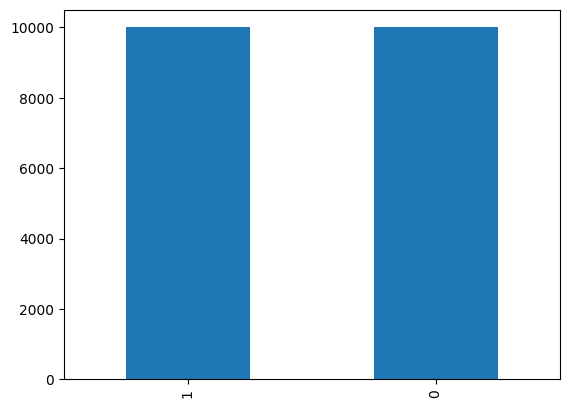

In [72]:
df['target'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Polarity by target')

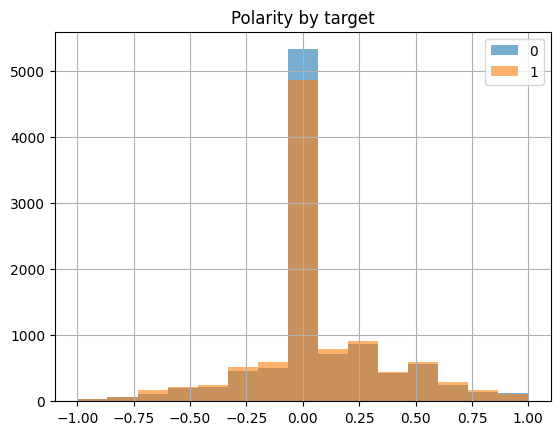

In [75]:
df_grouped = df.groupby('target')
df_grouped['polarity'].hist(alpha=0.6, bins=15, legend=True)
plt.title('Polarity by target')

Text(0.5, 1.0, 'Subjectivity by target')

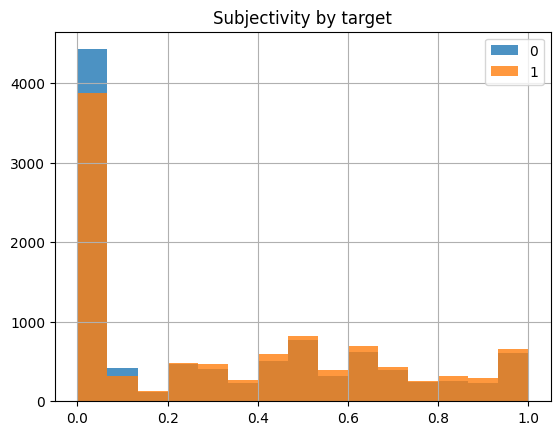

In [76]:
df_grouped = df.groupby('target')
df_grouped['subjectivity'].hist(alpha=0.8, bins=15, legend=True )
plt.title('Subjectivity by target')

Text(0.5, 1.0, 'Sentiment by target')

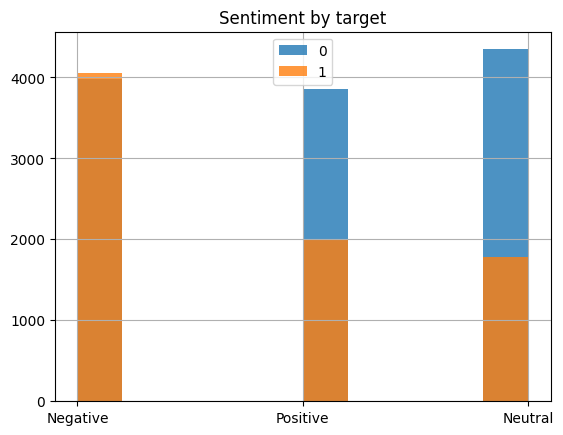

In [80]:
sc_df_grouped = sc_df.groupby('target')
sc_df_grouped['sentiment'].hist(alpha=0.8, legend=True )
plt.title('Sentiment by target')

<AxesSubplot: >

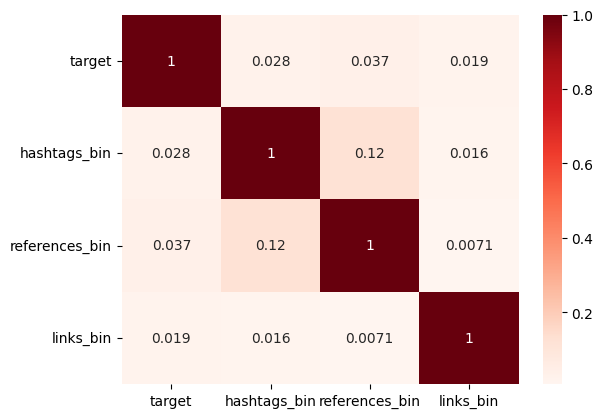

In [84]:
sns.heatmap(sc_df[['target','hashtags_bin','references_bin','links_bin']].corr(), annot=True, cmap='Reds')

<AxesSubplot: title={'center': 'Reference presence with target = 1'}>

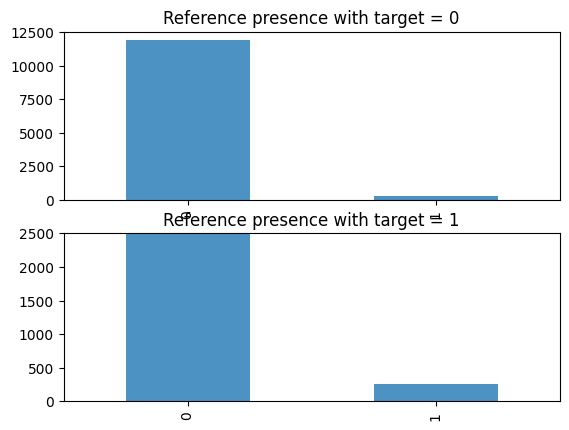

In [86]:
sc_df_grouped = sc_df.groupby('target')
plt.subplot(2,1,1)
plt.title('Reference presence with target = 0')
sc_df_grouped['references_bin'].get_group(0).value_counts().plot(kind='bar', alpha=0.8, xticks=(0,1))
plt.subplot(2,1,2)
plt.title('Reference presence with target = 1')
sc_df_grouped['references_bin'].get_group(1).value_counts().plot(kind='bar', alpha=0.8, ylim=(0,2500))

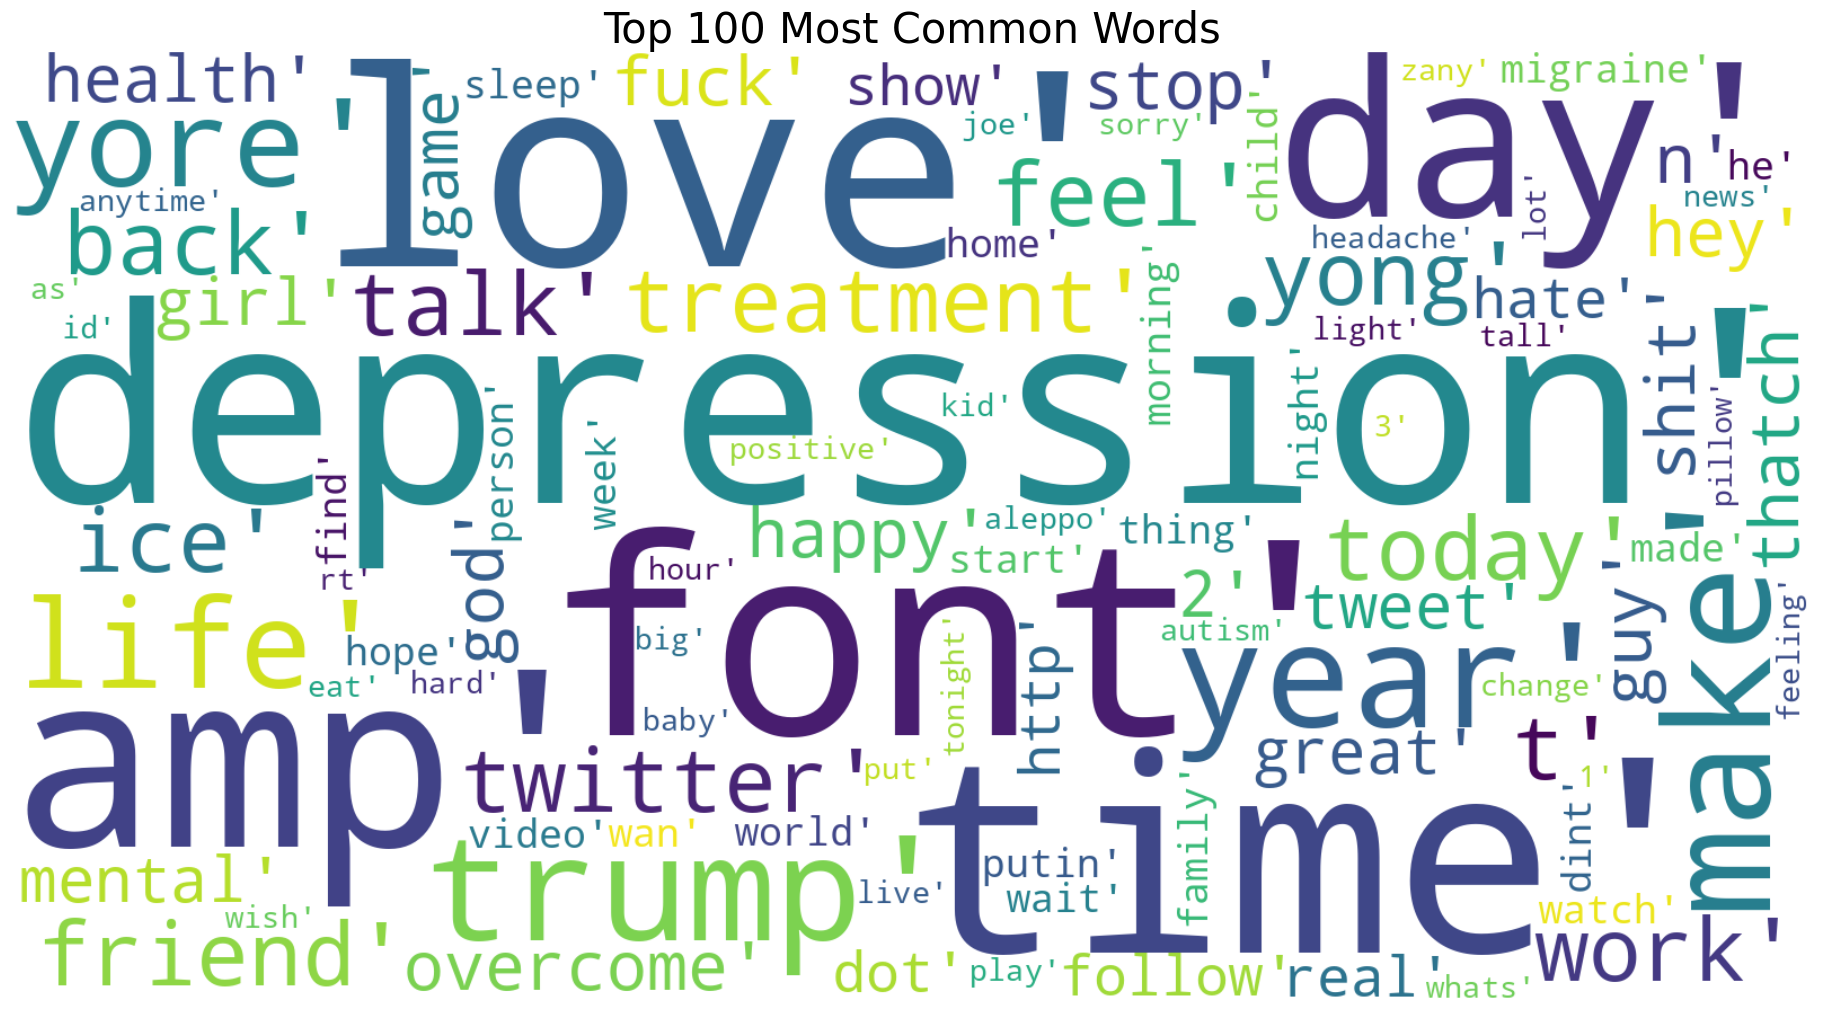

In [87]:
allwords = df['text'].str.split("[^\w+]").explode().tolist()
mostcommon = FreqDist(allwords).most_common(100)

wordcloud = WordCloud(width=1600, height=850, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)

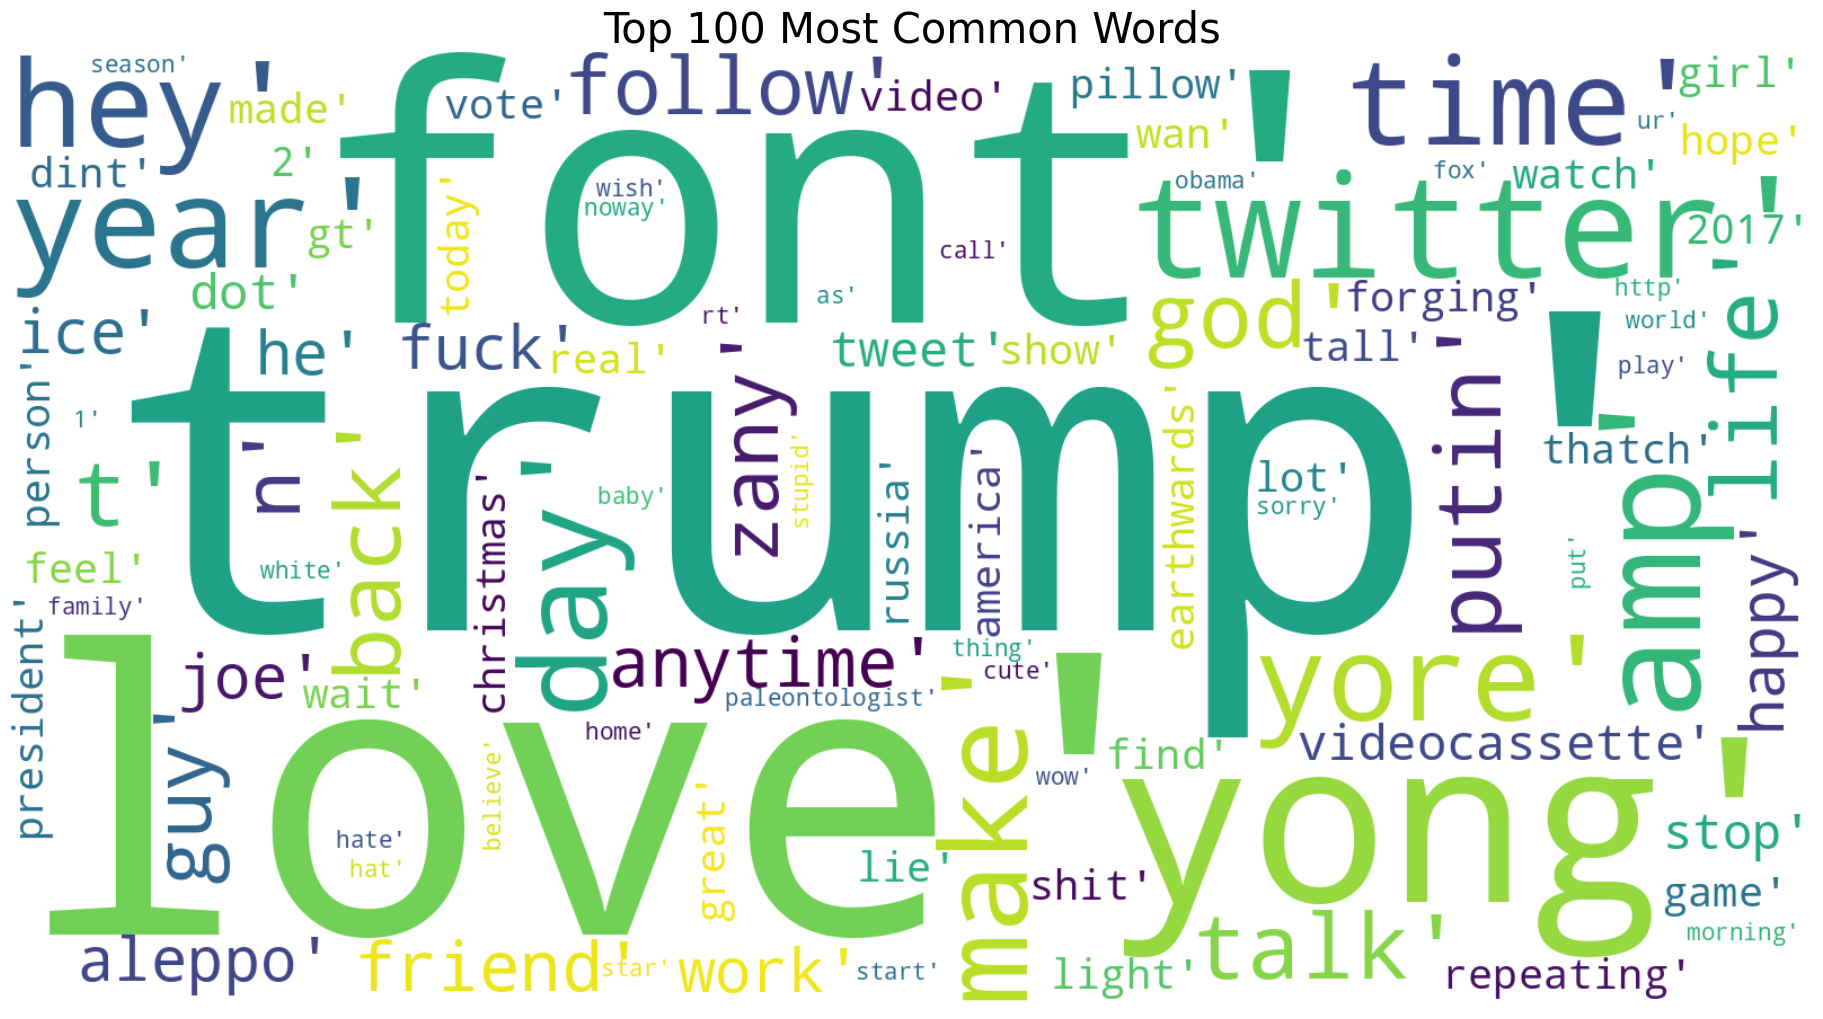

In [88]:
allwords_0 = df.groupby(['target']).get_group(0)['text'].str.split("[^\w+]").explode().tolist()
mostcommon = FreqDist(allwords_0).most_common(100)

wordcloud = WordCloud(width=1600, height=850, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)

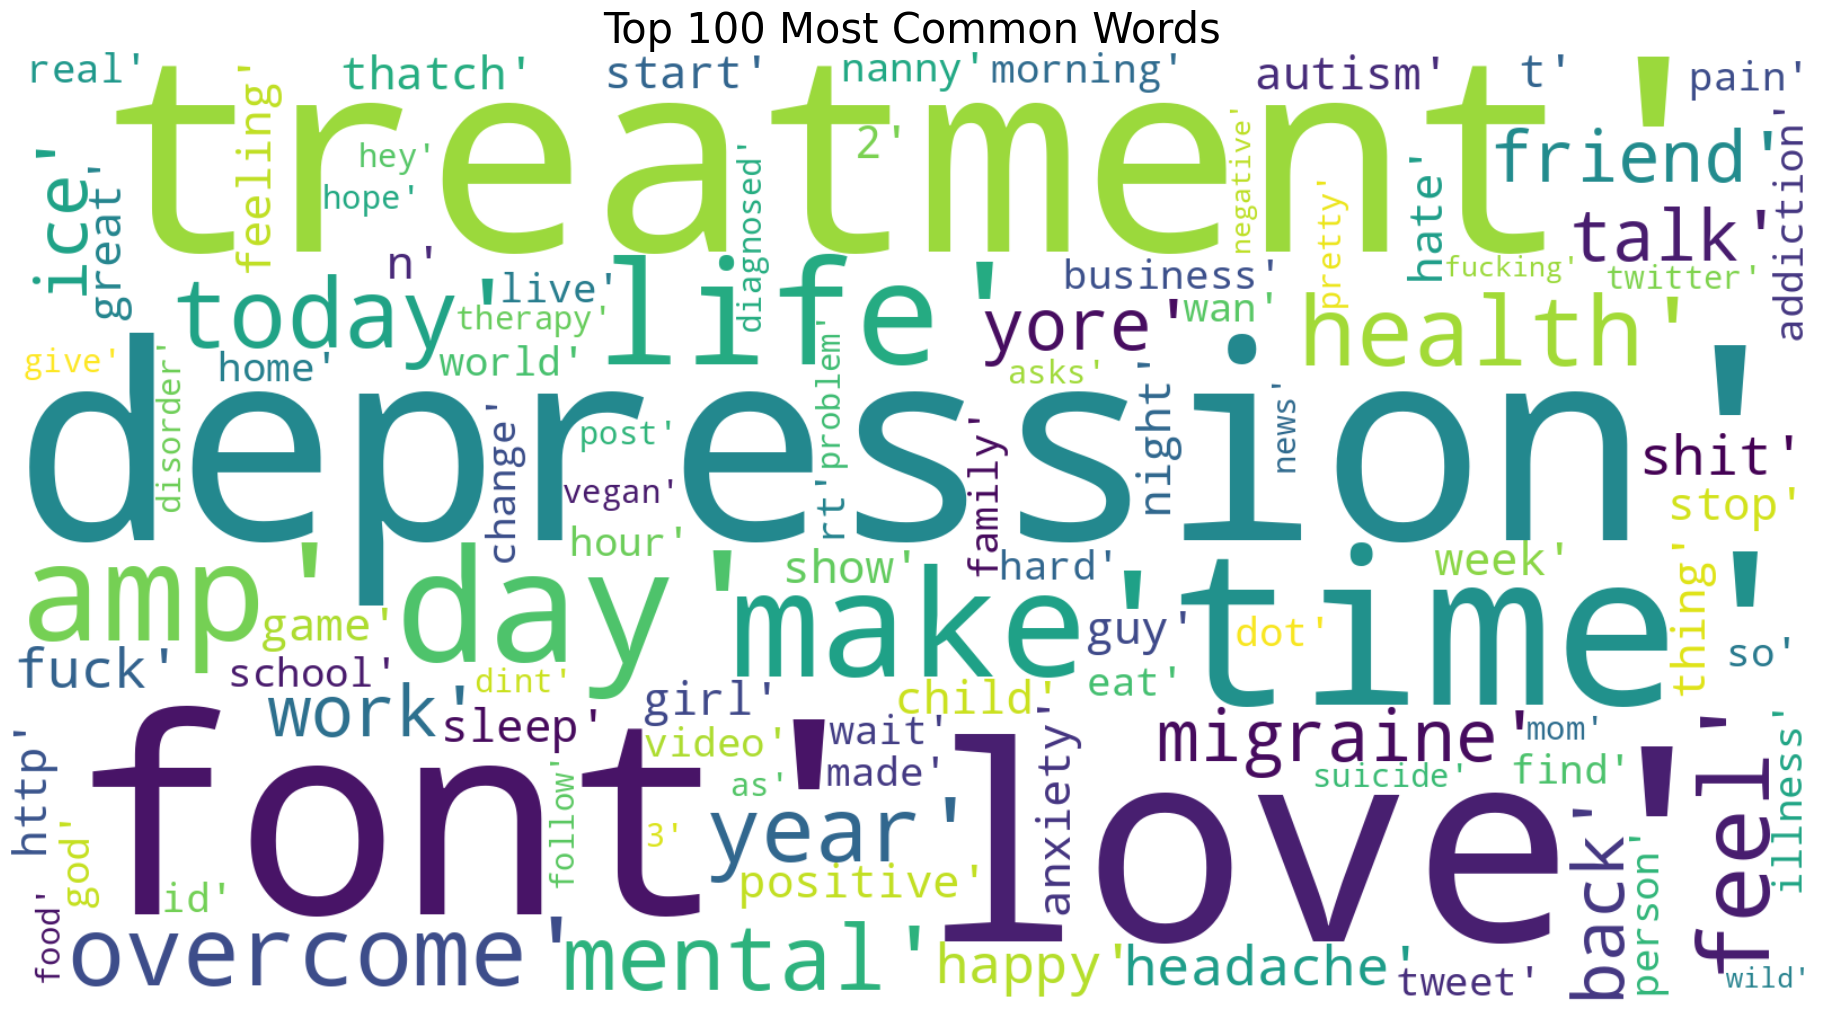

In [89]:
allwords_1 = df.groupby(['target']).get_group(1)['text'].str.split("[^\w+]").explode().tolist()
mostcommon = FreqDist(allwords_1).most_common(100)

wordcloud = WordCloud(width=1600, height=850, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=30)
plt.tight_layout(pad=0)

Text(0.5, 1.0, 'Frequency of 20 Most Common Words')

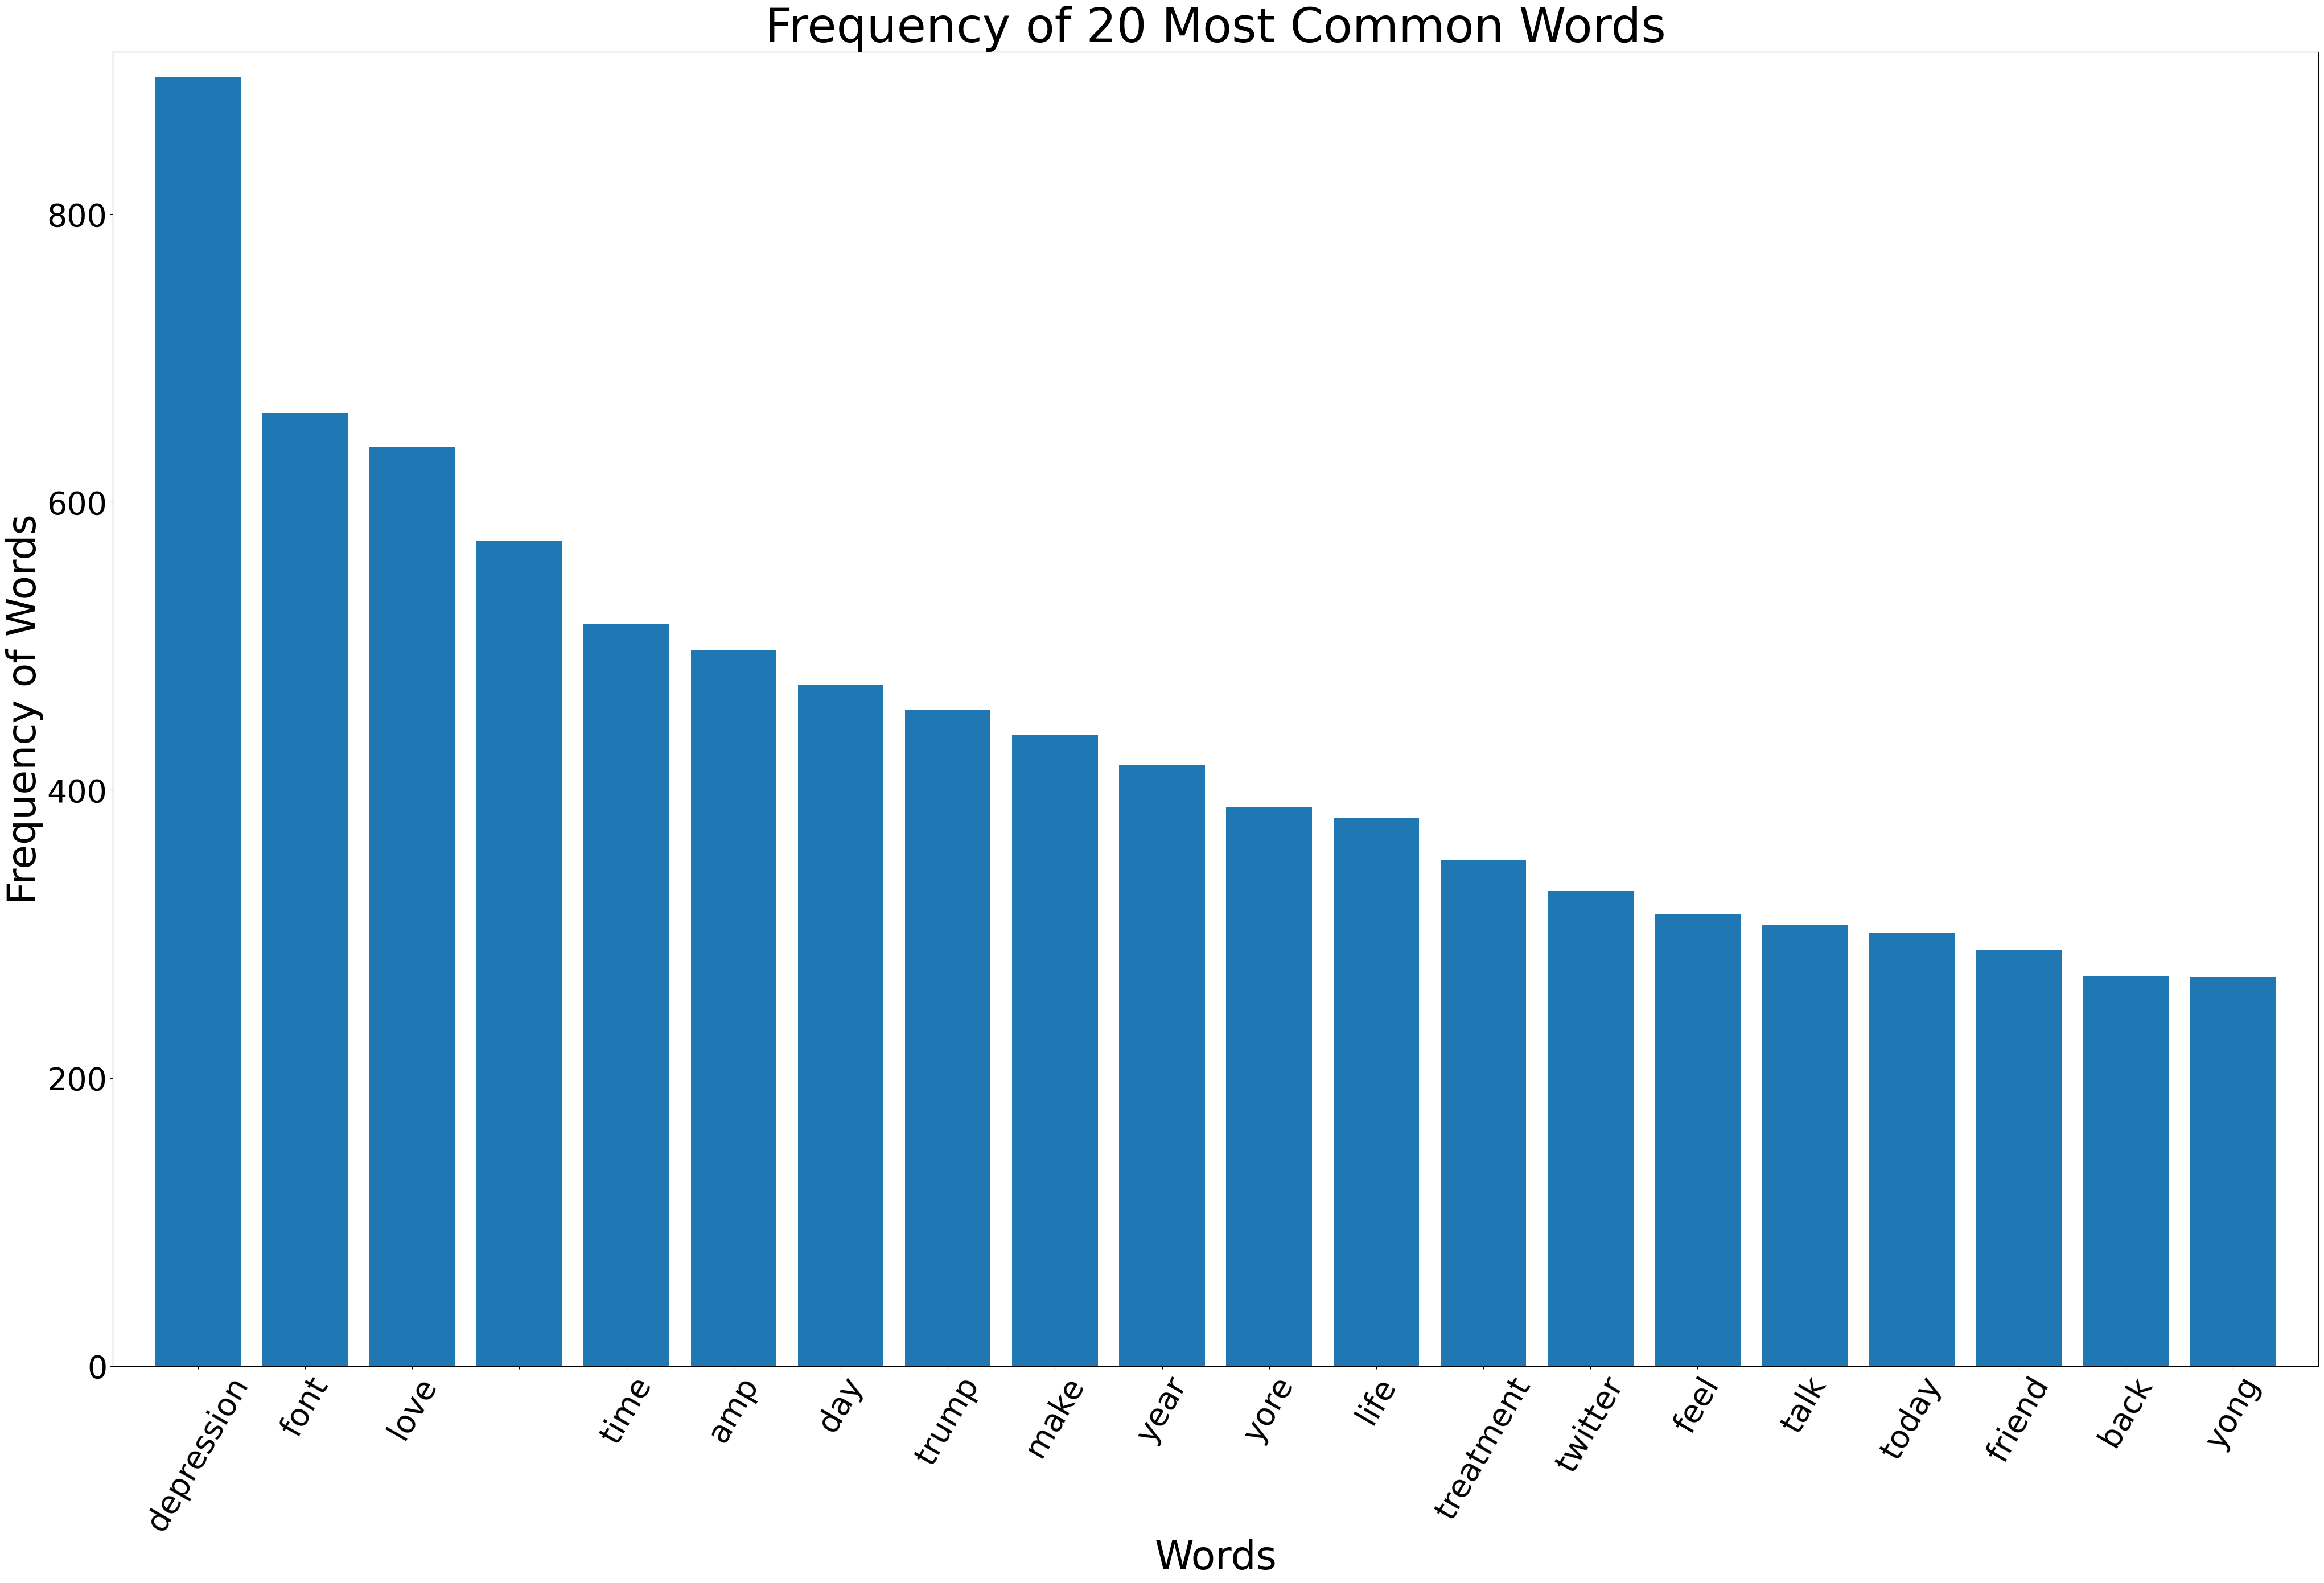

In [90]:
mostcommon_small = FreqDist(allwords).most_common(20)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words', fontsize=60)

Text(0.5, 1.0, 'Frequency of 20 Most Common Words, target = 0')

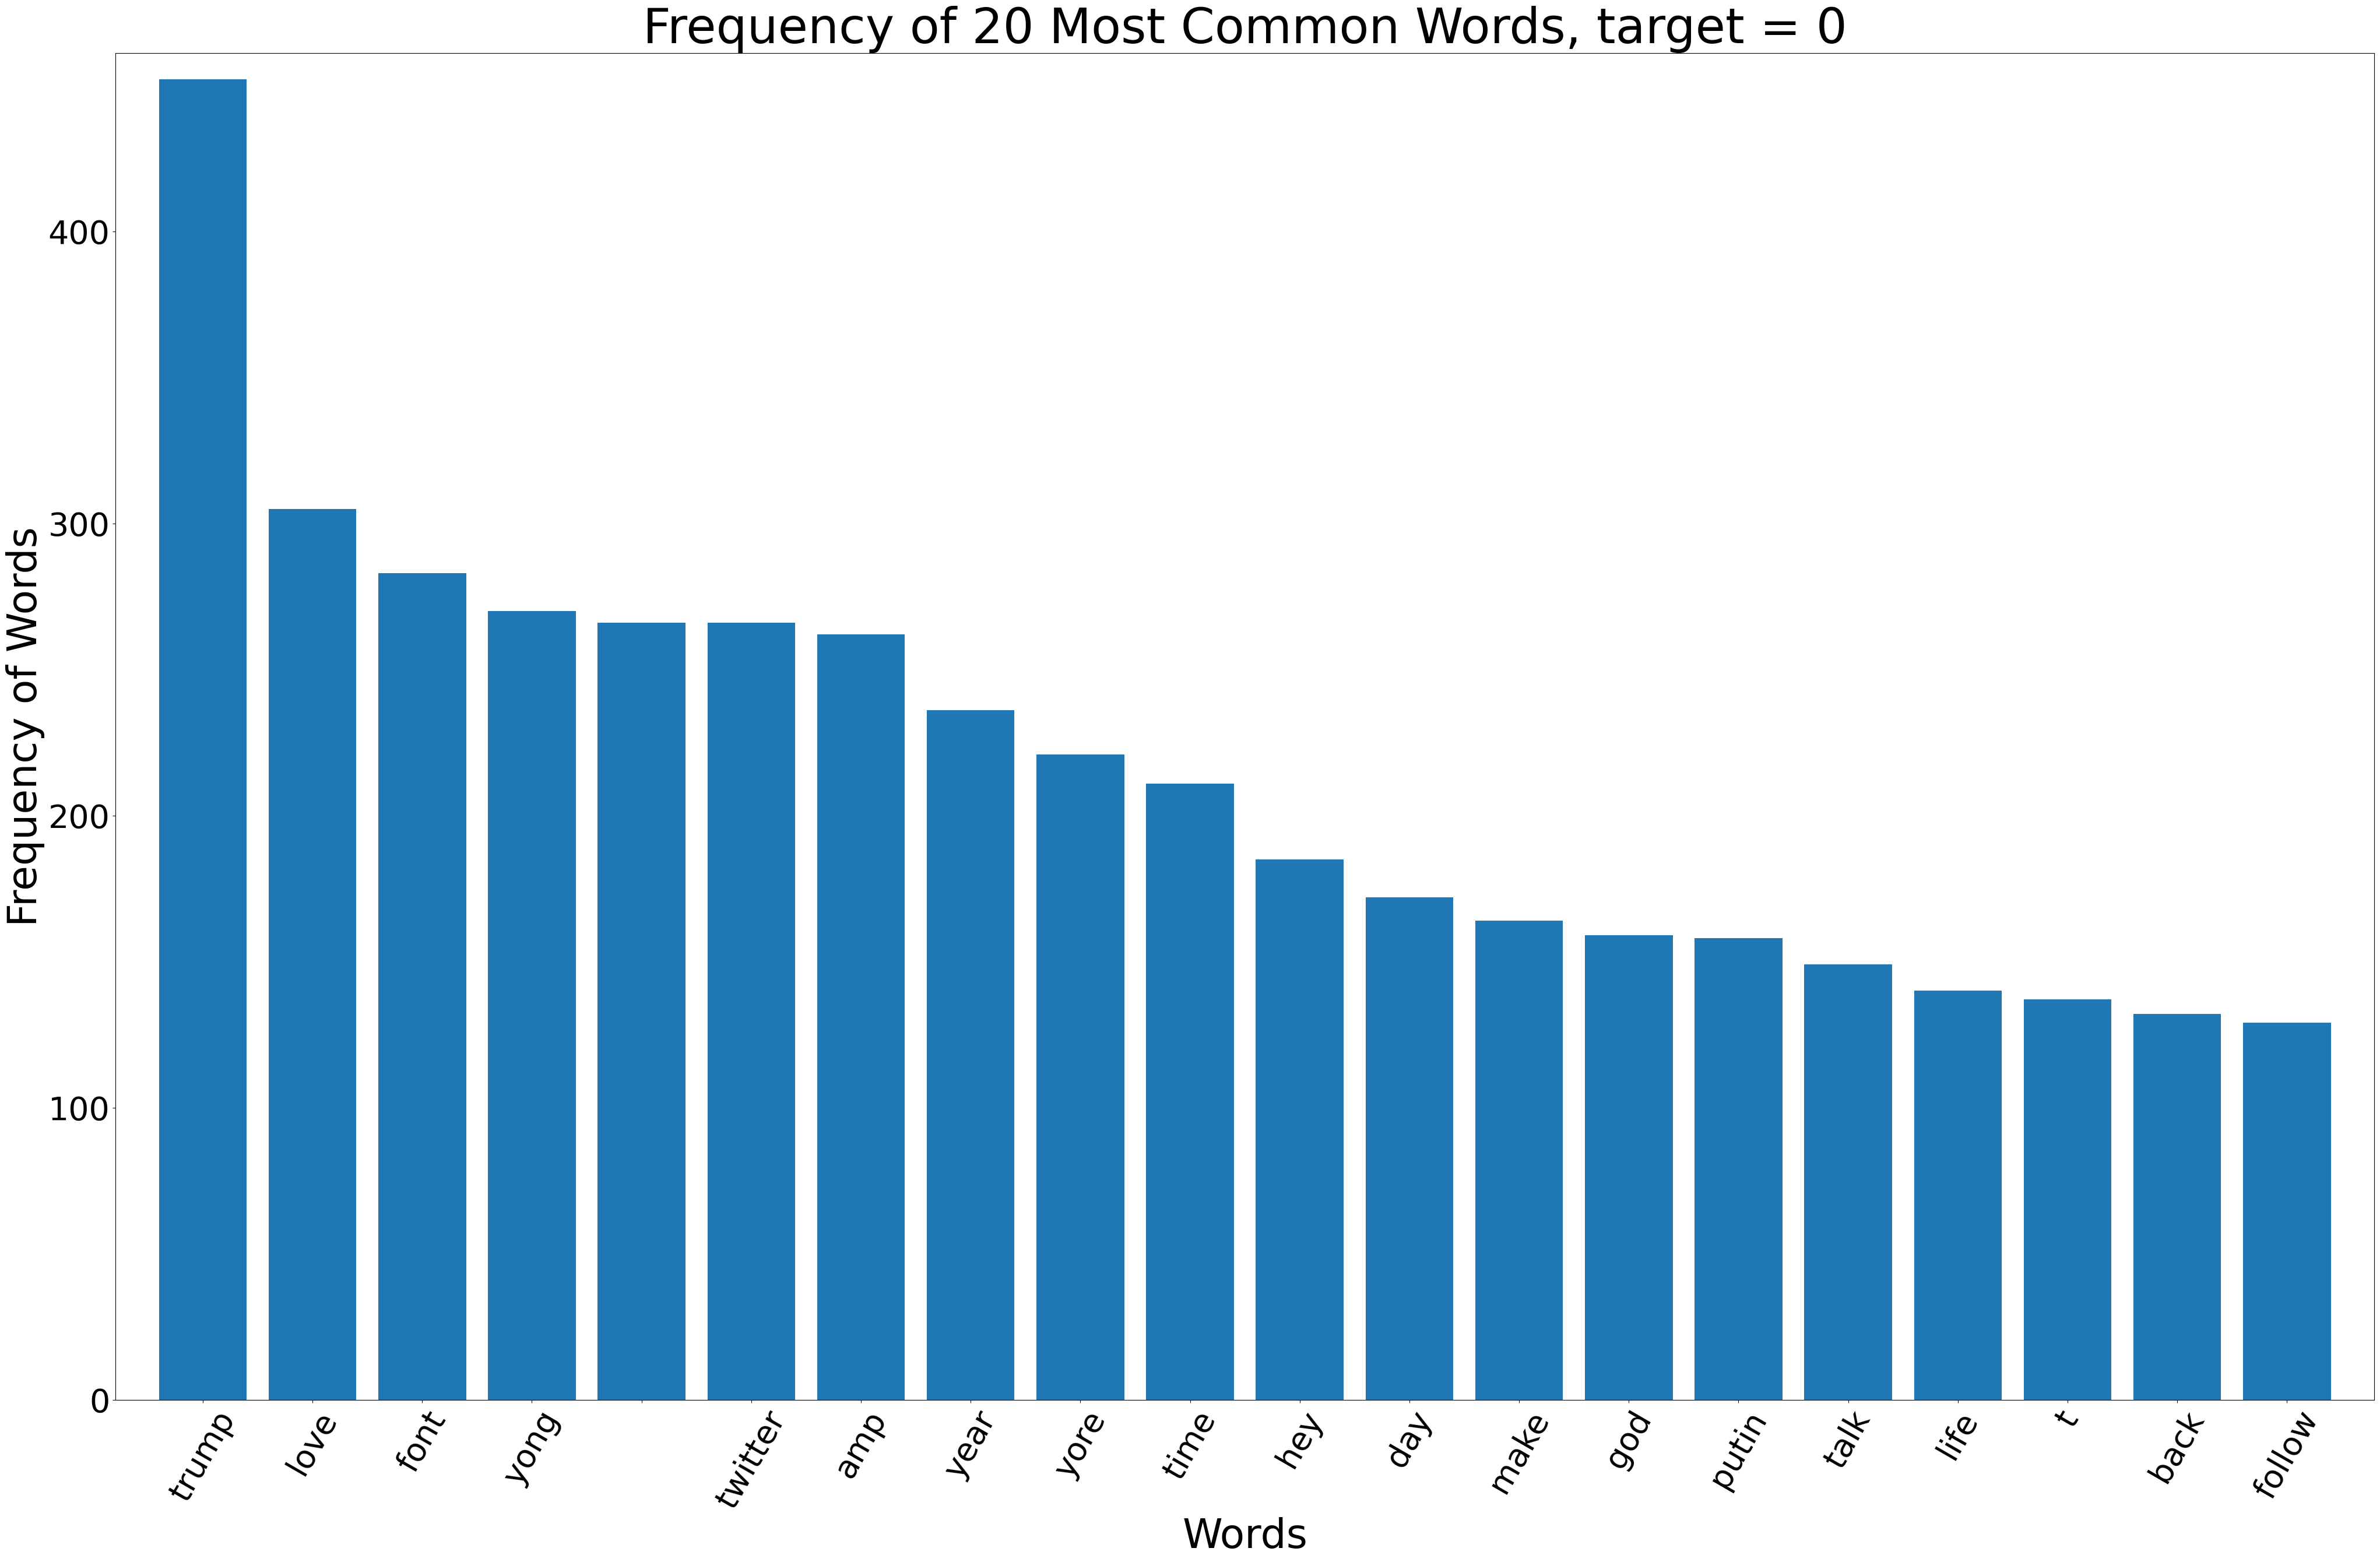

In [91]:
allwords_0 = df.groupby(['target']).get_group(0)['text'].str.split("[^\w+]").explode().tolist()
mostcommon_0 = FreqDist(allwords_0).most_common(20)
x, y = zip(*mostcommon_0)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words, target = 0', fontsize=60)

Text(0.5, 1.0, 'Frequency of 20 Most Common Words, target = 1')

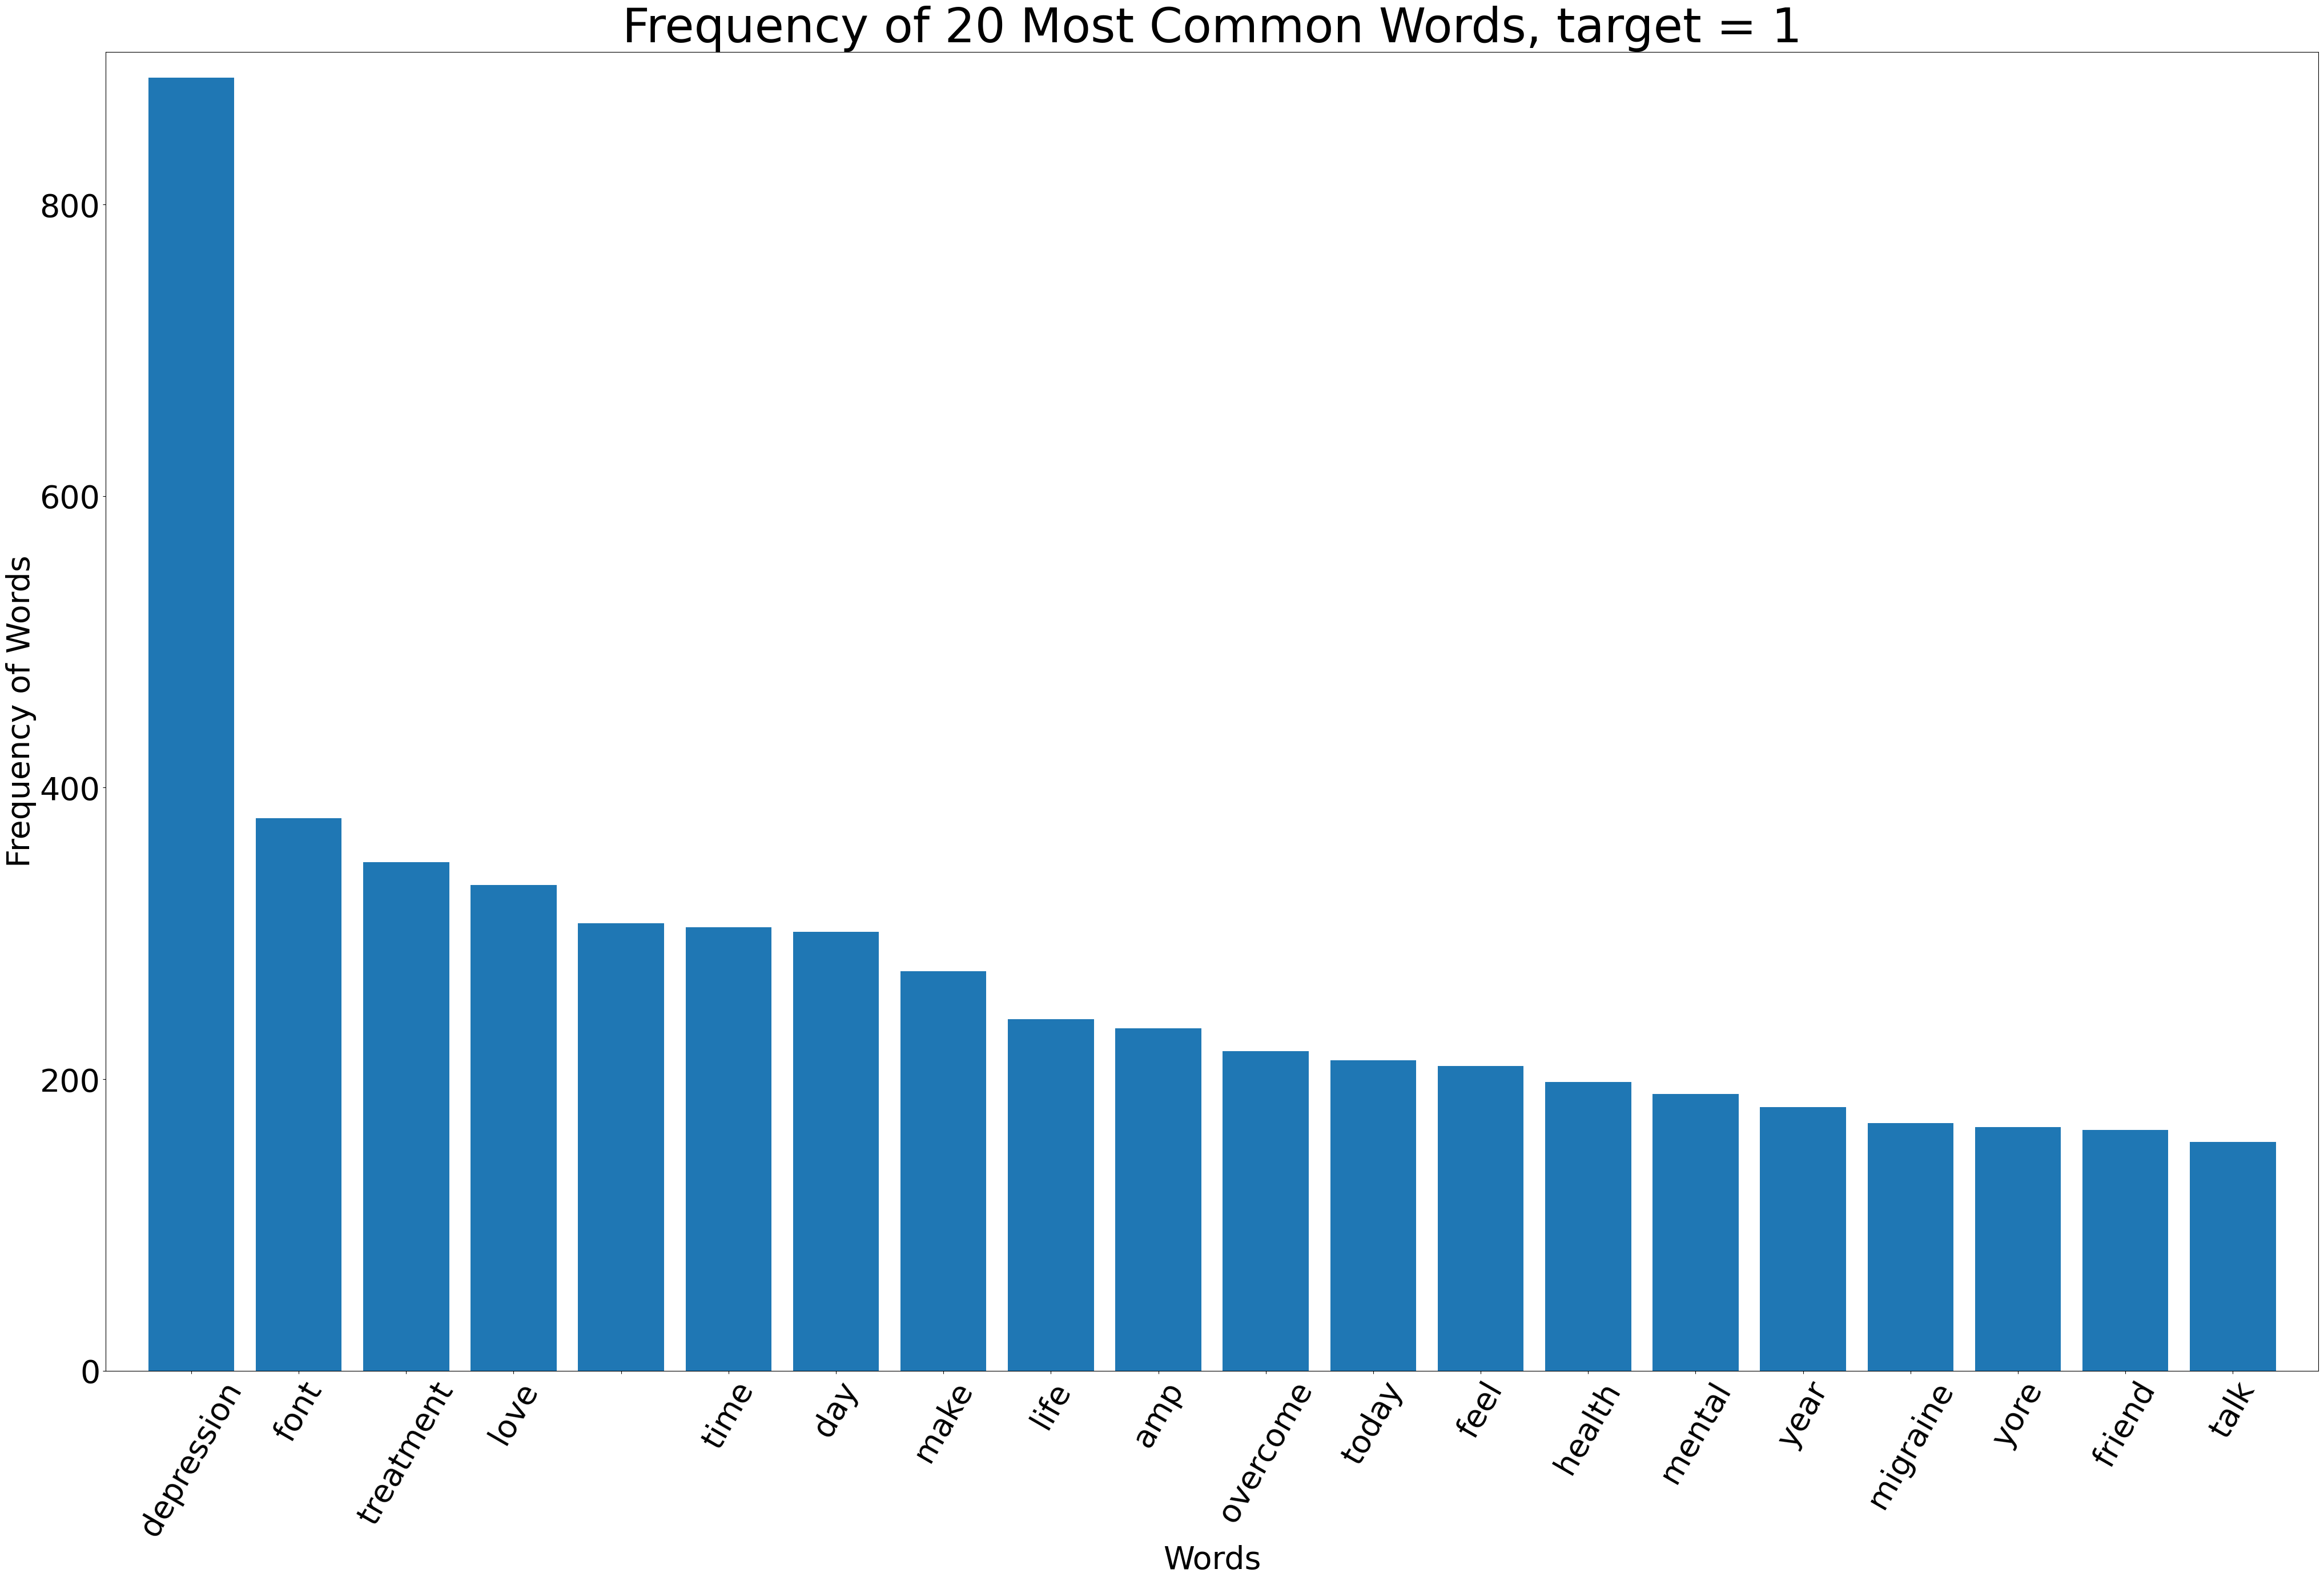

In [92]:
allwords_1 = df.groupby(['target']).get_group(1)['text'].str.split("[^\w+]").explode().tolist()
mostcommon_1 = FreqDist(allwords_1).most_common(20)
x, y = zip(*mostcommon_1)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words',fontsize=40)
plt.ylabel('Frequency of Words',fontsize=40)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 20 Most Common Words, target = 1', fontsize=60)